# EDA on Loan Defaulters Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import roc_auc_score
import os

## Phases
* Phase 1 - Fill missing values and fix individual columns
* Phase 2 - Understand distributions
* Phase 3 - Analyze relationships
* Phase 4 - Let's see

## Load Data

In [3]:
raw_data_path = "../data/raw/"

df = pd.read_csv(raw_data_path+"Dataset.csv")

df.head()

C:\Users\ompan\AppData\Local\Temp\ipykernel_24264\396317518.py:3: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(raw_data_path+"Dataset.csv")


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


## Understand data

In [4]:
print(df.shape)
print(df.columns.tolist()[:11])
print(df.columns.tolist()[11:21])
print(df.columns.tolist()[21:31])
print(df.columns.tolist()[31:])

(121856, 40)
['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client', 'Client_Income_Type']
['Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days']
['Own_House_Age', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation', 'Client_Family_Members', 'Client_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Client_Permanent_Match_Tag']
['Client_Contact_Work_Tag', 'Type_Organization', 'Score_Source_1', 'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau', 'Default']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

## Phase 1

### There are null values in this dataset and Columns (1,7,8,16,17,18,19,20,35) have mixed types

In [6]:
df.isna().sum().sort_values(ascending=False)

Own_House_Age                 80095
Score_Source_1                68835
Social_Circle_Default         61928
Client_Occupation             41435
Score_Source_3                26921
Credit_Bureau                 18540
ID_Days                        5968
Score_Source_2                 5686
Population_Region_Relative     4857
Loan_Annuity                   4812
Client_Income_Type             3701
Client_Housing_Type            3687
Phone_Change                   3664
Application_Process_Hour       3663
House_Own                      3661
Loan_Contract_Type             3651
Employed_Days                  3649
Client_Education               3645
Child_Count                    3638
Active_Loan                    3635
Credit_Amount                  3632
Bike_Owned                     3624
Registration_Days              3614
Type_Organization              3609
Client_Income                  3607
Age_Days                       3600
Car_Owned                      3581
Client_Marital_Status       

In [7]:
(df.isna().mean().sort_values(ascending=False) * 100)[:7]  # % missing

Own_House_Age            65.729221
Score_Source_1           56.488806
Social_Circle_Default    50.820641
Client_Occupation        34.003250
Score_Source_3           22.092470
Credit_Bureau            15.214680
ID_Days                   4.897584
dtype: float64

| Column                | Missing | Keep/Drop? | Strategy                                      |
| --------------------- | ------- | ---------- | --------------------------------------------- |
| Own_House_Age         | 65.7%   | Keep       | Impute 0 + Missing flag OR drop after testing |
| Score_Source_1        | 56.4%   | Keep       | Median + Missing flag                         |
| Social_Circle_Default | 50.8%   | Keep       | Median + Missing flag                         |
| Client_Occupation     | 34.0%   | Keep       | Fill "Unknown"                                |
| Score_Source_3        | 22.1%   | Keep       | Median + Missing flag                         |
| Credit_Bureau         | 15.2%   | Keep       | Median + Missing flag                         |


### Handle mixed type columns first

In [8]:
type(2.0)

float

In [9]:
bad_cols = [1,7,8,16,17,18,19,20,35]
for idx in bad_cols:
    col = df.columns[idx]
    print("\n\n=== Column:", col, "===")
    print(set([x for x in df[col] if (type(x) != float or type(x) != int)]))  # show sample unique values
    print(df[col].dtype)



=== Column: Client_Income ===
{nan, '10485', '6952.5', '7807.5', '11529', 16425.0, 8235.0, '50850', nan, '23670', '5355', 32850.0, 16470.0, nan, '5880.6', '28800', nan, '22860', '3643.65', '8226', '53100', '78750', '12749.85', 16515.0, 8325.0, '15233.4', nan, nan, '14842.35', nan, nan, '7624.8', '23620.5', '54000', '8175.15', 24750.0, 16560.0, 8370.0, '20835', '30312', '11700', nan, '126000', '4590', nan, 8415.0, nan, 16614.0, '7364.7', '8124.3', '14040', '45225', '12744.9', '11151', nan, '4523.85', '83700', 57600.0, '16200', 16650.0, '12285', 8460.0, '19216.35', '11743.65', '14160.6', nan, '13050', '8955', '31950', nan, '23040', '4410', '16298.1', nan, '4518.45', nan, nan, '43875', 49500.0, nan, nan, '3478.5', '18630', 16740.0, 8550.0, nan, 16749.0, '14760', '14850', '48330', nan, '8008.65', '13815', '675000', '19215', '43380', '7987.5', '6473.25', 24975.0, '6300', nan, '11823.3', '17775', nan, '35550', 41400.0, '17553.15', '24750', 25026.3, nan, '12348', '10080', '2913.3', '20790',

In [10]:
# fix each column

for idx in bad_cols:
    col = df.columns[idx]
    df[col] = (
        df[col]
        .astype(str)           # convert everything to string
        .str.replace(",", "")  # remove commas
        .str.strip()           # strip spaces
        .replace(["", " ", "nan", "NaN", "None"], np.nan)
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [11]:
for idx in bad_cols:
    col = df.columns[idx]
    print(df[col].dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118234 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118219 non-null  float64
 8   Loan_Annuity                117030 non-null  float64
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

### Create missing-value flags

In [13]:
high_missing_cols = [
    'Own_House_Age',
    'Score_Source_1',
    'Social_Circle_Default',
    'Client_Occupation',
    'Score_Source_3',
    'Credit_Bureau',
]

### Visualize missingness correlation

In [14]:
(df.isna().mean().sort_values(ascending=False) * 100)[:7]  # % missing

Own_House_Age            65.729221
Score_Source_1           56.488806
Social_Circle_Default    50.820641
Client_Occupation        34.003250
Score_Source_3           22.093290
Credit_Bureau            15.214680
ID_Days                   4.911535
dtype: float64

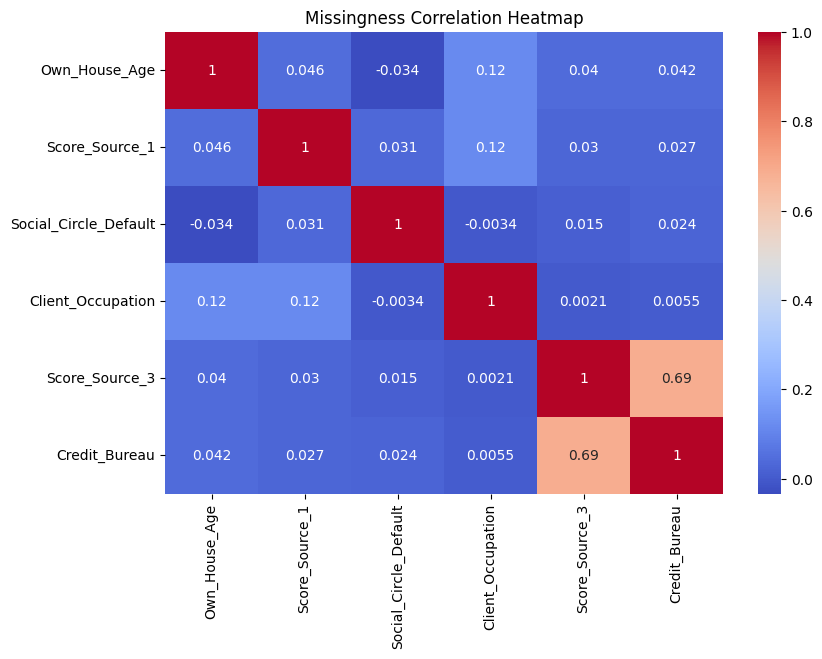

In [15]:
plt.figure(figsize=(9,6))
sns.heatmap(df[high_missing_cols].isna().corr(), annot=True, cmap="coolwarm")
plt.title("Missingness Correlation Heatmap")
plt.show()

In [16]:
# Check their individual predictive power
for col in ['Credit_Bureau', 'Score_Source_3']:
    auc = roc_auc_score(df['Default'], df[col].fillna(df[col].median()))
    print(col, auc)


Credit_Bureau 0.5118346322176812
Score_Source_3 0.3570683648166511


score source 3 when inverted, might be helpful

In [17]:
auc_flipped = roc_auc_score(df['Default'], -df['Score_Source_3'].fillna(df['Score_Source_3'].median()))
auc_flipped

0.6429316351833487

:)

Now, fixing individual columns of high missing data

In [18]:
# "missing" means "rent"
df['Own_House_Age_missing'] = df['Own_House_Age'].isna().astype(int)
df['Own_House_Age'] = df['Own_House_Age'].fillna(0)

In [19]:
# If missing - customer wasn’t scored - often higher risk.
df['Score_Source_1_missing'] = df['Score_Source_1'].isna().astype(int)
df['Score_Source_1'] = df['Score_Source_1'].fillna(df['Score_Source_1'].median())

In [20]:
# Defaults among friends/family - extremely predictive
df['Social_Circle_Default_missing'] = df['Social_Circle_Default'].isna().astype(int)
df['Social_Circle_Default'] = df['Social_Circle_Default'].fillna(0)

In [21]:
# missing occupation -> high risk
df['Client_Occupation'] = df['Client_Occupation'].fillna("Unknown")

In [22]:
# 
df['Score_Source_3_missing'] = df['Score_Source_3'].isna().astype(int)
df['Score_Source_3'] = df['Score_Source_3'].fillna(df['Score_Source_3'].median())

In [23]:
# missing credit info - medium risk
df['Credit_Bureau_missing'] = df['Credit_Bureau'].isna().astype(int)
df['Credit_Bureau'] = df['Credit_Bureau'].fillna(df['Credit_Bureau'].median())

In [24]:
# 1. Calculate missing percentage column-wise
missing_pct = df.isna().mean() * 100

# 2. Identify columns with <5% missing
low_missing_cols = missing_pct[missing_pct < 5].index.tolist()

# 3. Separate numeric and categorical among low-missing columns
numeric_cols = df[low_missing_cols].select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df[low_missing_cols].select_dtypes(include=['object']).columns

print("\nNumeric (<5% missing):", numeric_cols.tolist())
print("Categorical (<5% missing):", categorical_cols.tolist())


Numeric (<5% missing): ['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Family_Members', 'Client_City_Rating', 'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_1', 'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau', 'Default', 'Own_House_Age_missing', 'Score_Source_1_missing', 'Social_Circle_Default_missing', 'Score_Source_3_missing', 'Credit_Bureau_missing']
Categorical (<5% missing): ['Accompany_Client', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Client_Occupation', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Type_Organization']


In [25]:
# 4. Apply imputations conditionally
# --- Numeric: Fill with median ---
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

# --- Categorical: Fill with mode ---
for col in categorical_cols:
    try:
        df[col] = df[col].fillna(df[col].mode()[0])
    except:
        # fallback: replace with string "Unknown"
        df[col] = df[col].fillna("Unknown")

print("\nImputation complete.")


Imputation complete.


In [26]:
sum(df.isnull().sum())

0

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ID                             121856 non-null  int64  
 1   Client_Income                  121856 non-null  float64
 2   Car_Owned                      121856 non-null  float64
 3   Bike_Owned                     121856 non-null  float64
 4   Active_Loan                    121856 non-null  float64
 5   House_Own                      121856 non-null  float64
 6   Child_Count                    121856 non-null  float64
 7   Credit_Amount                  121856 non-null  float64
 8   Loan_Annuity                   121856 non-null  float64
 9   Accompany_Client               121856 non-null  object 
 10  Client_Income_Type             121856 non-null  object 
 11  Client_Education               121856 non-null  object 
 12  Client_Marital_Status         

### I'm happy with these columns - no missing values, got some more info(columns) out of missing items, etc.

### Save Data as it is now. Use it to start proper EDA and a little more feature-engineering

In [31]:
os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/dataset_cleaned_v1.csv", index=False)

## Phase 2

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, math
from pathlib import Path

In [33]:
df = pd.read_csv("../data/processed/dataset_cleaned_v1.csv")

In [34]:
df['ID'] = df['ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 45 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ID                             121856 non-null  object 
 1   Client_Income                  121856 non-null  float64
 2   Car_Owned                      121856 non-null  float64
 3   Bike_Owned                     121856 non-null  float64
 4   Active_Loan                    121856 non-null  float64
 5   House_Own                      121856 non-null  float64
 6   Child_Count                    121856 non-null  float64
 7   Credit_Amount                  121856 non-null  float64
 8   Loan_Annuity                   121856 non-null  float64
 9   Accompany_Client               121856 non-null  object 
 10  Client_Income_Type             121856 non-null  object 
 11  Client_Education               121856 non-null  object 
 12  Client_Marital_Status         

### I would like to find which columns are ordinal and which are nominal
* Can't just say - numeric -> ordinal and categorical -> nominal

In [35]:
cardinality = df.nunique().sort_values()
cardinality

Bike_Owned                            2
Car_Owned                             2
House_Own                             2
Active_Loan                           2
Loan_Contract_Type                    2
Client_Contact_Work_Tag               2
Homephone_Tag                         2
Mobile_Tag                            2
Workphone_Working                     2
Client_Permanent_Match_Tag            2
Own_House_Age_missing                 2
Score_Source_3_missing                2
Credit_Bureau_missing                 2
Score_Source_1_missing                2
Social_Circle_Default_missing         2
Default                               2
Client_City_Rating                    3
Client_Gender                         3
Client_Marital_Status                 4
Client_Education                      5
Client_Housing_Type                   6
Accompany_Client                      7
Application_Process_Day               7
Client_Income_Type                    8
Child_Count                          14


In [36]:
# binary columns are nominal/categorical
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
print(binary_cols)

for col in binary_cols:
    print(col, "→", list(df[col].unique()))

['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Loan_Contract_Type', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Default', 'Own_House_Age_missing', 'Score_Source_1_missing', 'Social_Circle_Default_missing', 'Score_Source_3_missing', 'Credit_Bureau_missing']
Car_Owned → [np.float64(0.0), np.float64(1.0)]
Bike_Owned → [np.float64(0.0), np.float64(1.0)]
Active_Loan → [np.float64(1.0), np.float64(0.0)]
House_Own → [np.float64(0.0), np.float64(1.0)]
Loan_Contract_Type → ['CL', 'RL']
Mobile_Tag → [np.int64(1), np.int64(0)]
Homephone_Tag → [np.int64(1), np.int64(0)]
Workphone_Working → [np.int64(0), np.int64(1)]
Client_Permanent_Match_Tag → ['Yes', 'No']
Client_Contact_Work_Tag → ['Yes', 'No']
Default → [np.int64(0), np.int64(1)]
Own_House_Age_missing → [np.int64(1), np.int64(0)]
Score_Source_1_missing → [np.int64(0), np.int64(1)]
Social_Circle_Default_missing → [np.int64(0), np.int64(1)]
Score_Source_3_missing → [np.i

In [37]:
cat_cols = binary_cols.copy()
# now categoricals of cardinality < 10
tertiary_cols = ['Client_Gender', 'Client_Marital_Status', 'Client_Housing_Type', 'Accompany_Client', 'Application_Process_Day', 'Client_Income_Type']
cat_cols.extend(tertiary_cols)

In [38]:
for col in tertiary_cols:
    print(col, df[col].unique())

Client_Gender ['Male' 'Female' 'XNA']
Client_Marital_Status ['M' 'W' 'S' 'D']
Client_Housing_Type ['Home' 'Family' 'Office' 'Municipal' 'Rental' 'Shared']
Accompany_Client ['Alone' 'Relative' 'Others' 'Kids' 'Partner' '##' 'Group']
Application_Process_Day [6. 3. 4. 2. 5. 1. 0.]
Client_Income_Type ['Commercial' 'Service' 'Retired' 'Govt Job' 'Student' 'Unemployed'
 'Maternity leave' 'Businessman']


In [39]:
print(cat_cols)

['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Loan_Contract_Type', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Default', 'Own_House_Age_missing', 'Score_Source_1_missing', 'Social_Circle_Default_missing', 'Score_Source_3_missing', 'Credit_Bureau_missing', 'Client_Gender', 'Client_Marital_Status', 'Client_Housing_Type', 'Accompany_Client', 'Application_Process_Day', 'Client_Income_Type']


### Univariate Analysis
What is the distribution, behavior, and quality of EACH feature on its own?

#### Numerical Features

In [57]:
num_cols = []
[num_cols.append(x) for x in df.columns if x not in cat_cols and x != "ID"]
print(num_cols)

['Client_Income', 'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Client_Education', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age', 'Client_Occupation', 'Client_Family_Members', 'Client_City_Rating', 'Application_Process_Hour', 'Type_Organization', 'Score_Source_1', 'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau', 'Employed_Days_missing', 'Own_House_Age_bin']


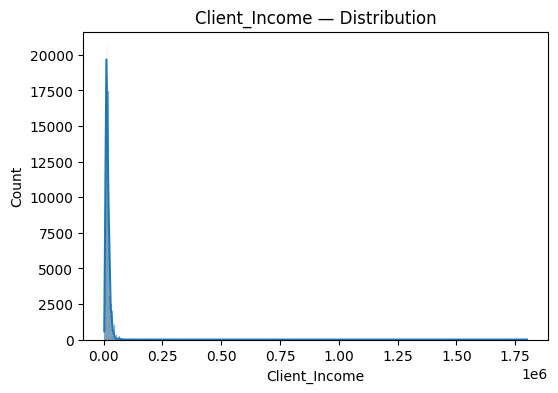

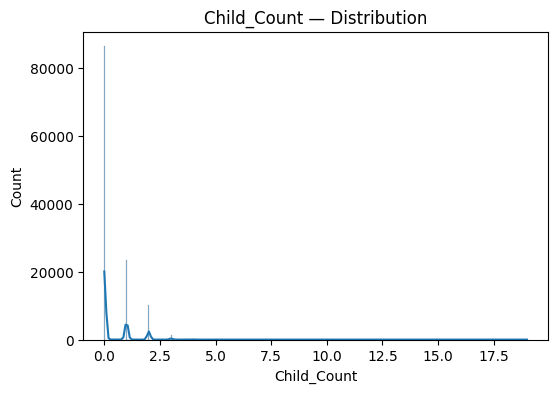

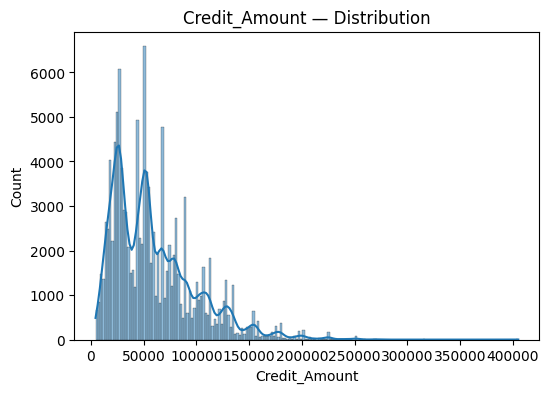

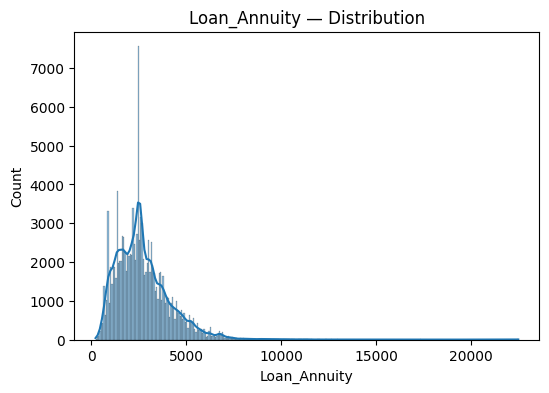

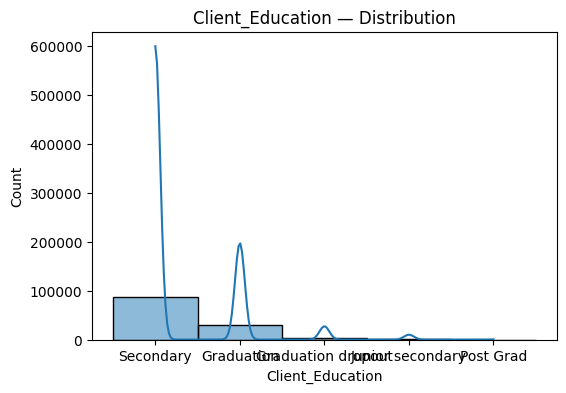

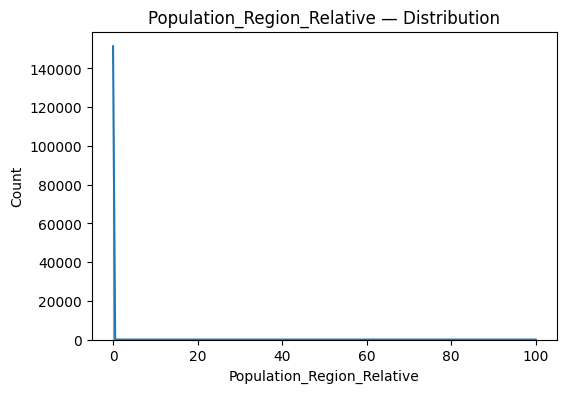

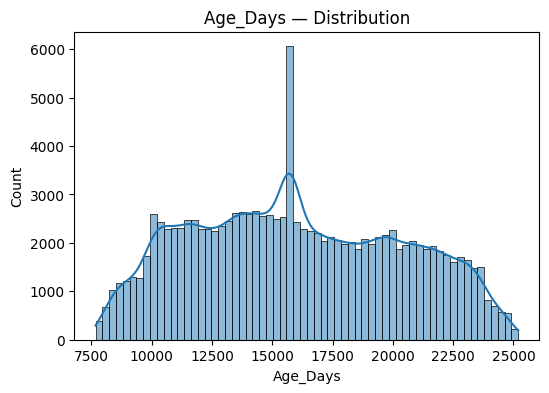

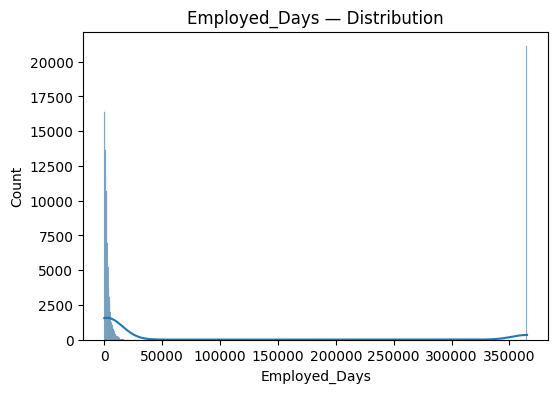

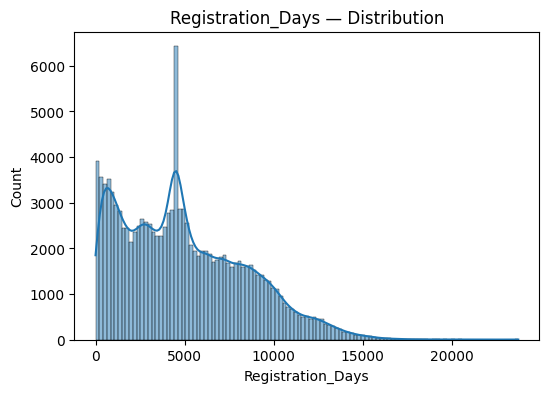

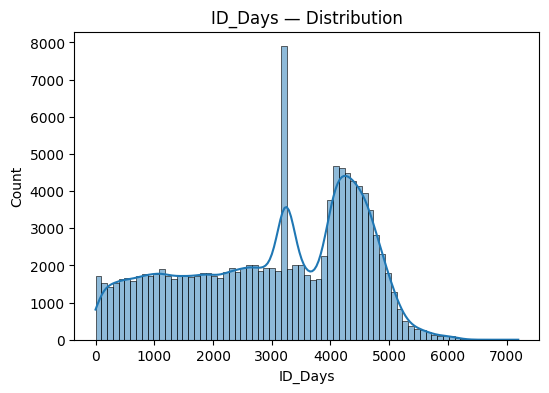

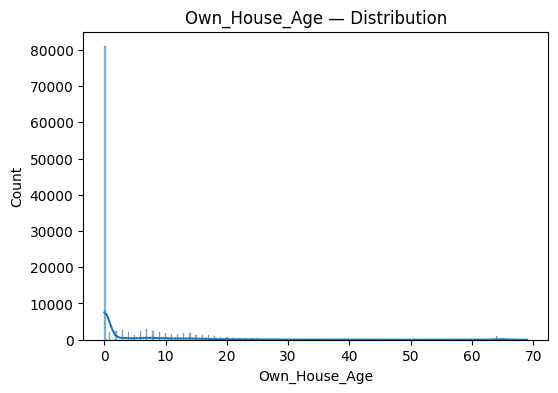

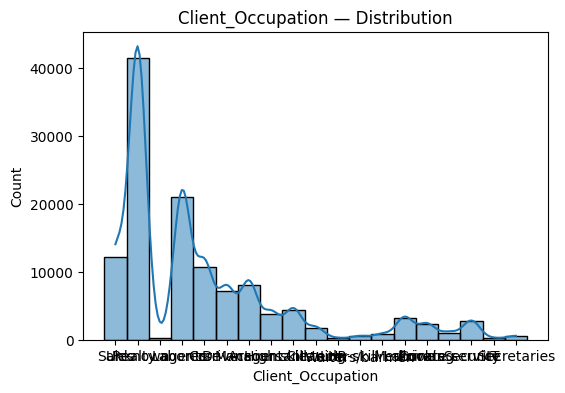

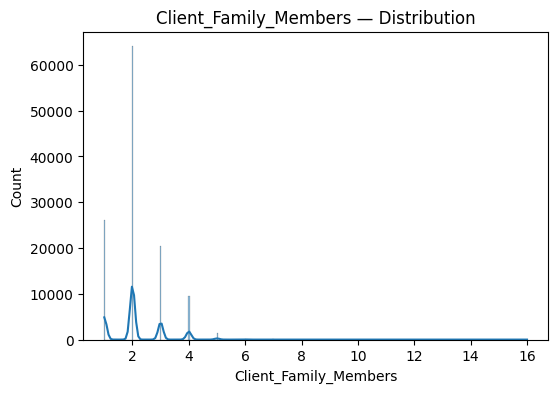

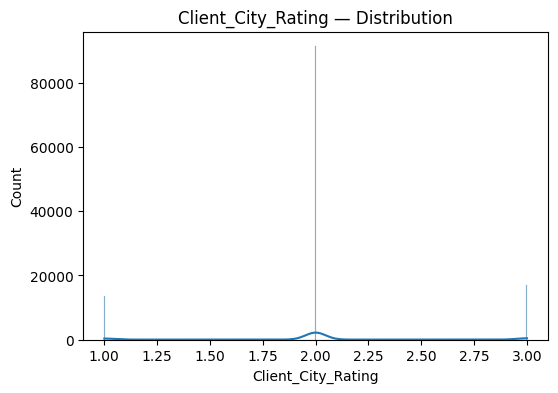

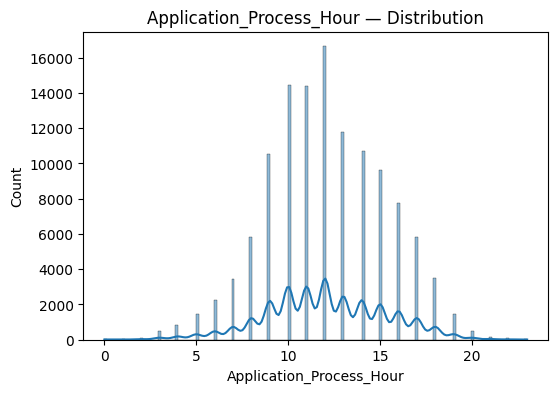

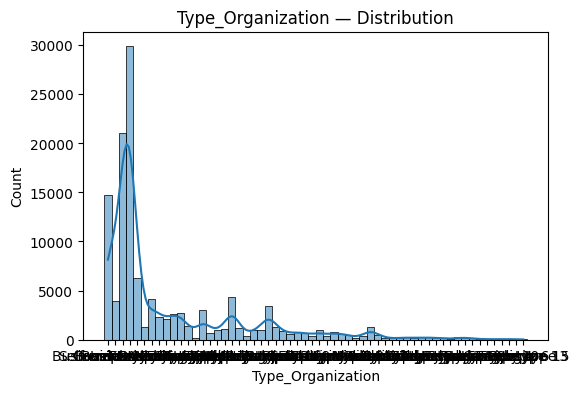

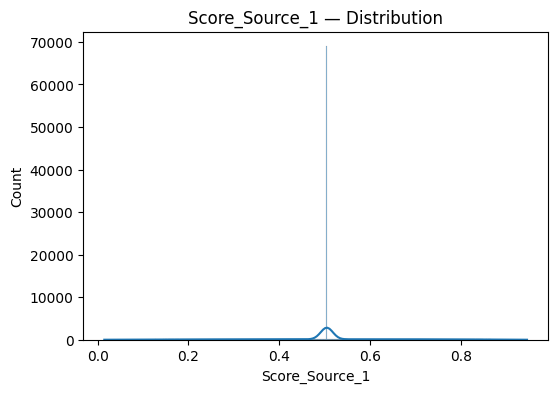

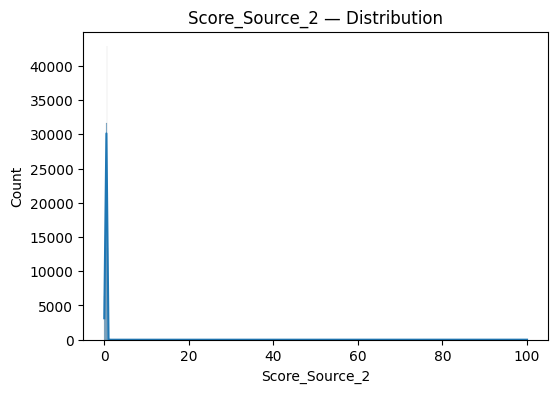

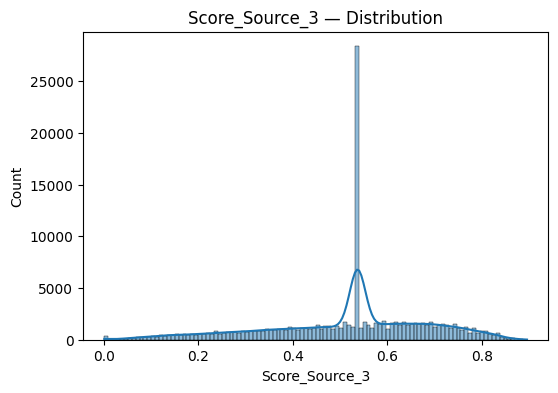

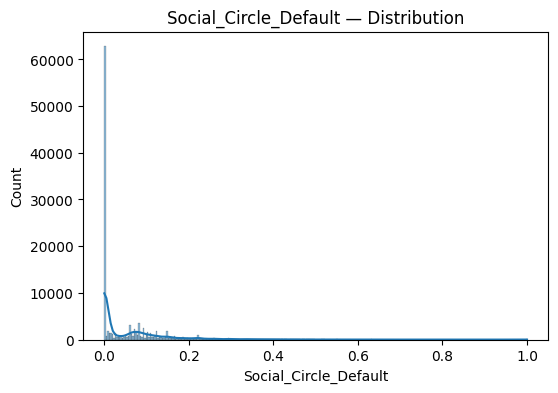

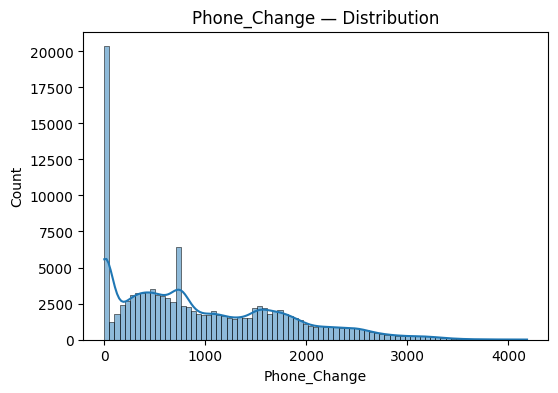

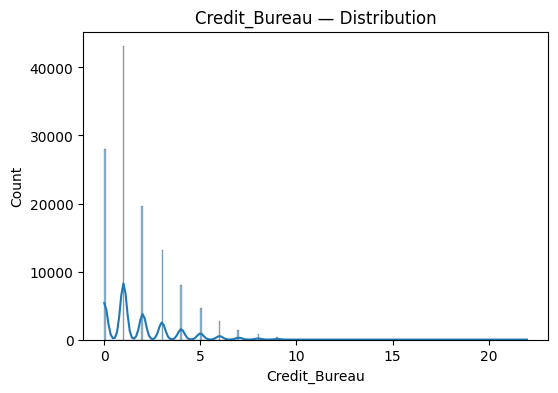

In [41]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} — Distribution")
    plt.show()

#### Need to cap some columns

In [42]:
df['Child_Count'] = df['Child_Count'].clip(upper=8)
df['Credit_Amount'] = df['Credit_Amount'].clip(upper=df['Credit_Amount'].quantile(0.995))

# Convert negative to positive
df['Employed_Days'] = df['Employed_Days'].abs()

# Replace unrealistic placeholder values
df['Employed_Days'] = df['Employed_Days'].replace(365243, np.nan)

# Add missing flag
df['Employed_Days_missing'] = df['Employed_Days'].isna().astype(int)

# Cap at 40 years
df['Employed_Days'] = df['Employed_Days'].clip(upper=365 * 40)


In [43]:
# bin house age
df['Own_House_Age_bin'] = pd.cut(
    df['Own_House_Age'],
    bins=[0, 1, 5, 10, 20, 50, 100],
    labels=['none/unknown','0-5','5-10','10-20','20-50','50+']
)


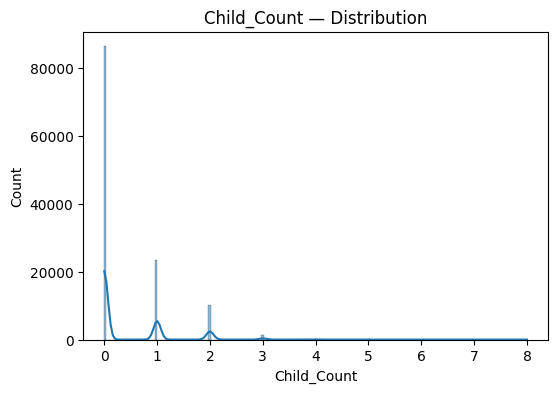

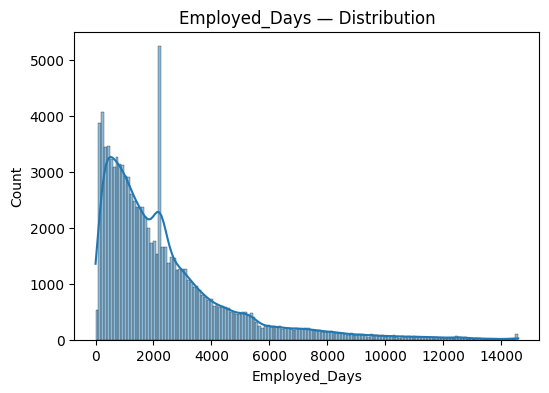

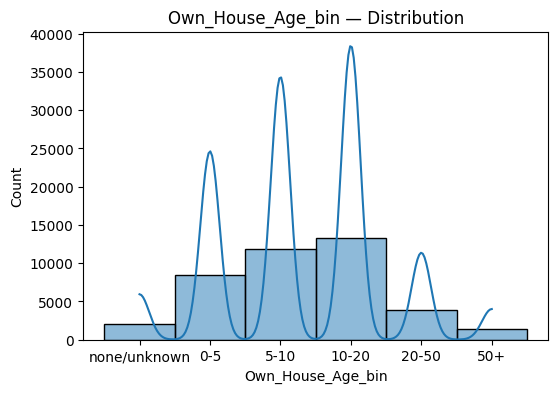

In [44]:
for col in ['Child_Count', 'Employed_Days', 'Own_House_Age_bin']:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} — Distribution")
    plt.show()

### Categorical Features

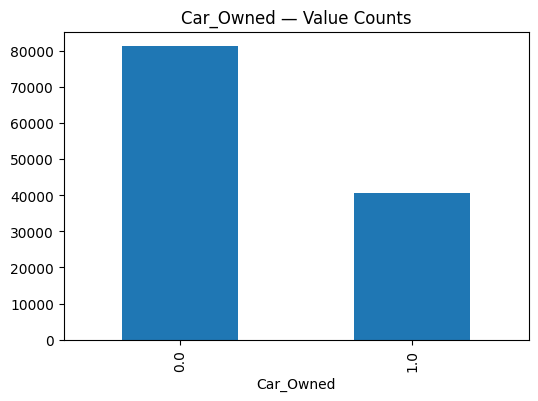

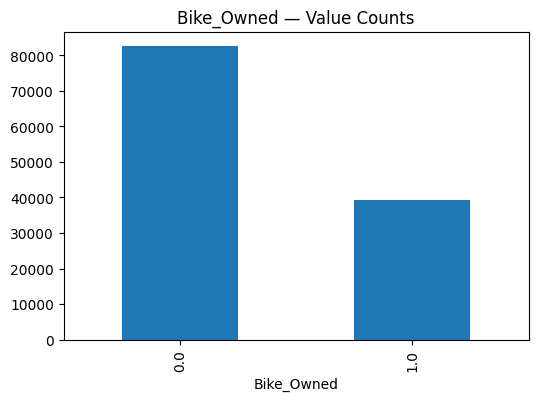

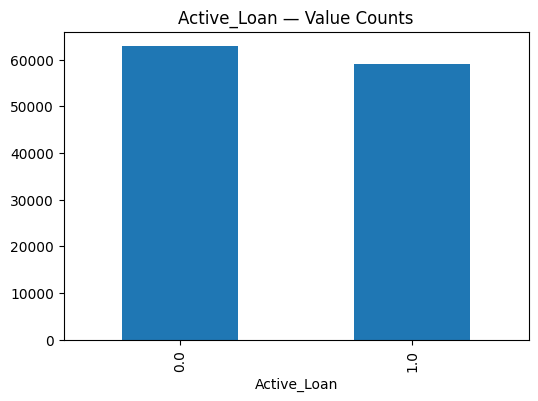

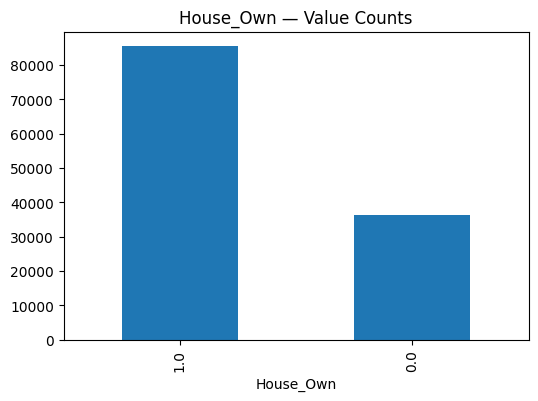

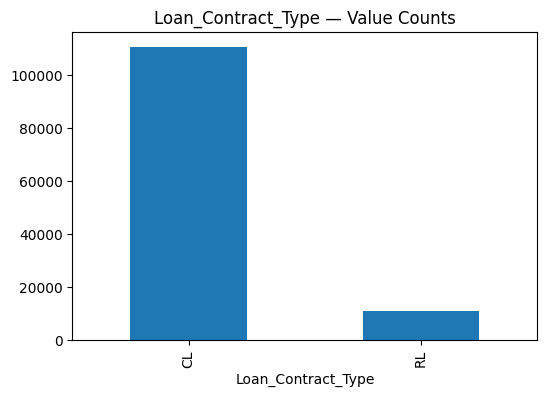

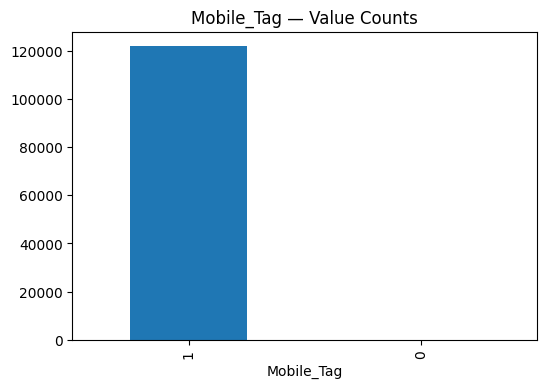

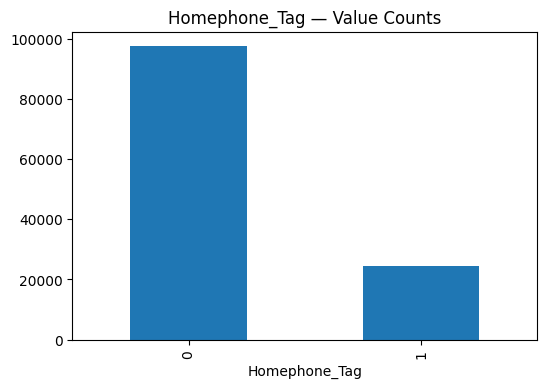

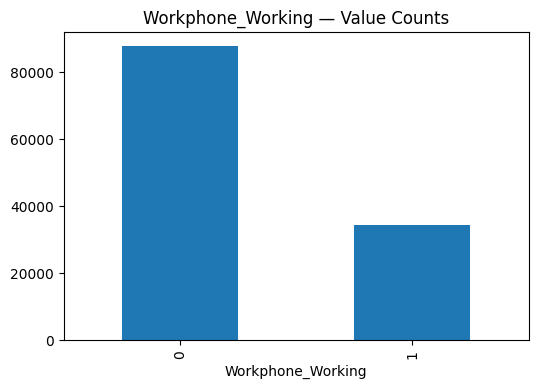

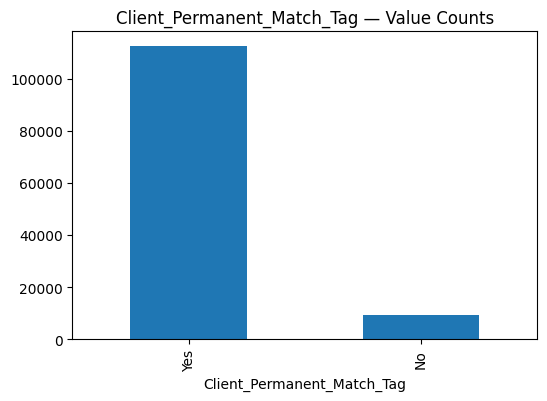

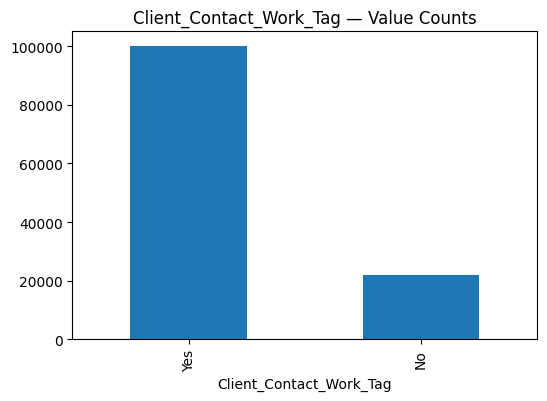

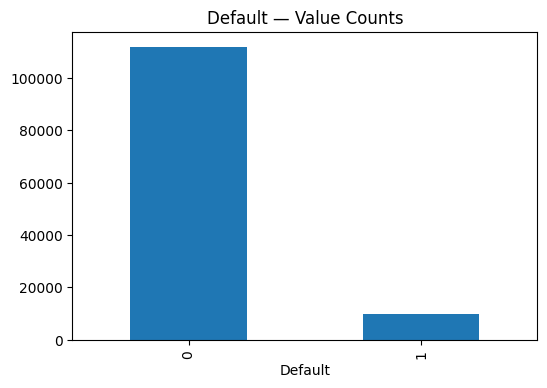

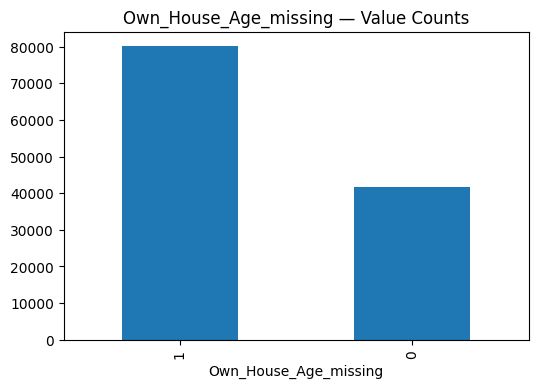

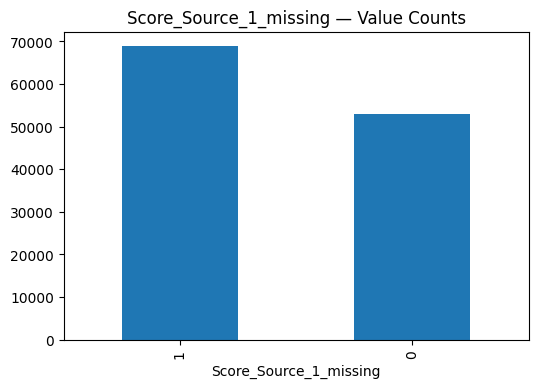

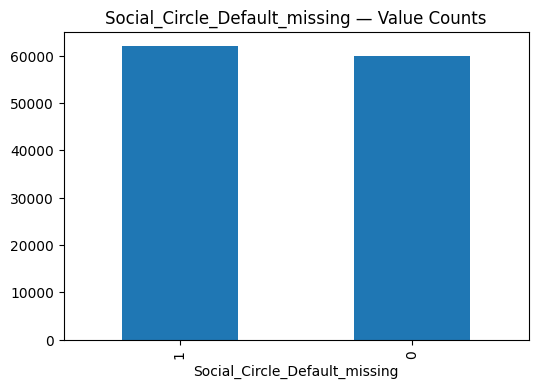

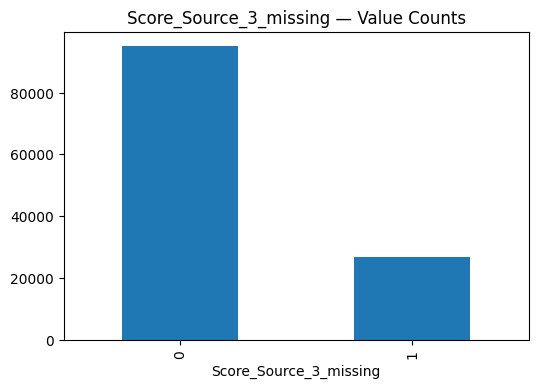

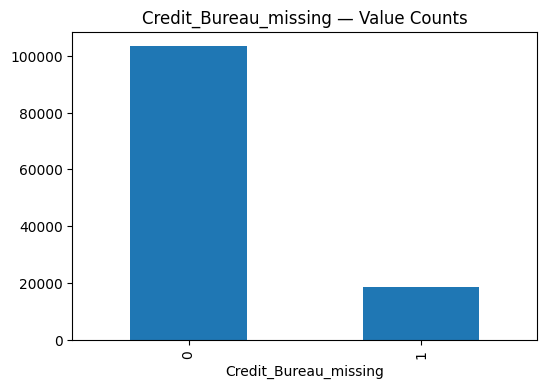

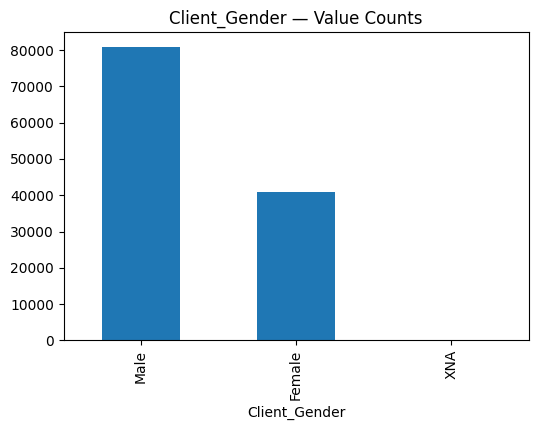

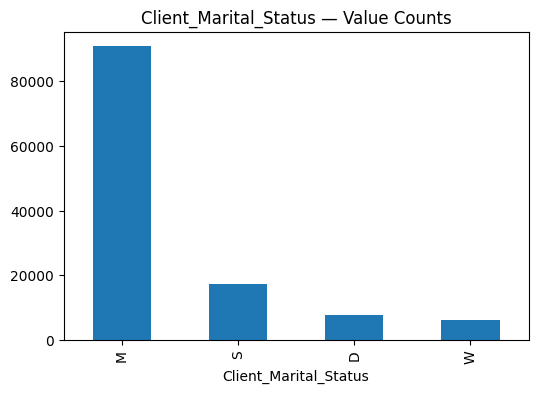

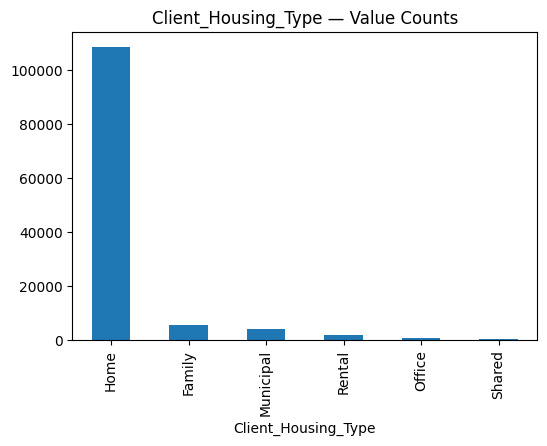

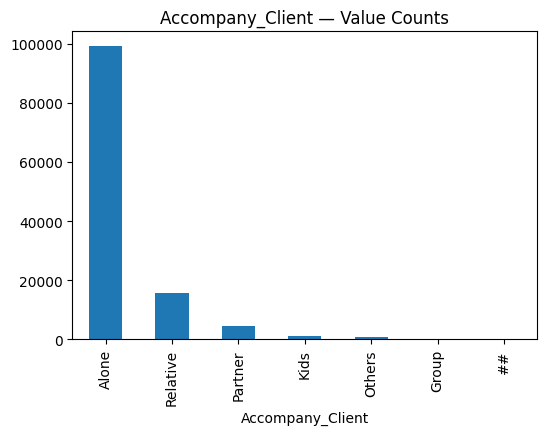

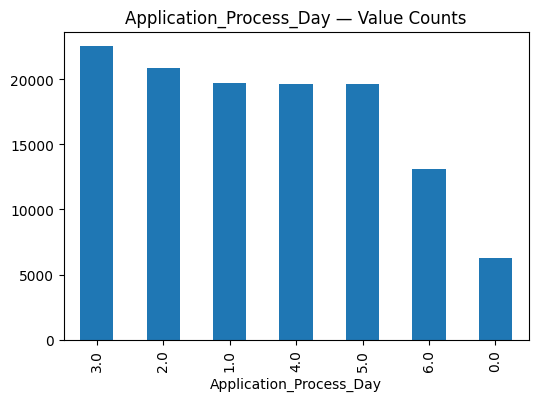

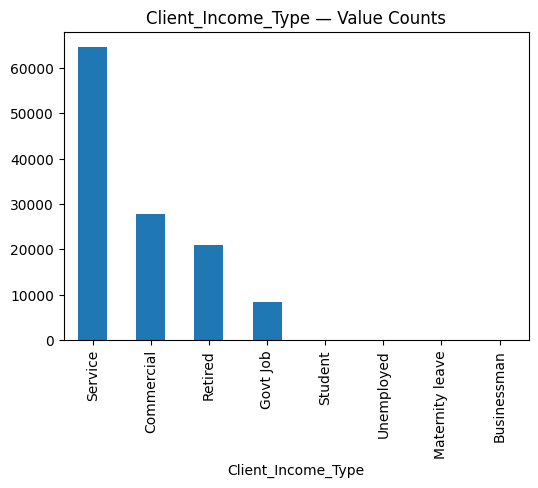

In [45]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f"{col} — Value Counts")
    plt.show()

#### Talking points
* Mobile_Tag - very few zeroes. Can't help modelling. Drop the column
* Default - obviously imbalanced
* Gender - XNA: very tiny - Drop the row(s)
* Accompany_Client - Replace '##', Combine rare classes (Kids, Others, Group)
* Client_Income_client - Combine rare classes

In [46]:
df.drop(['Mobile_Tag'], inplace=True, axis=1)

In [47]:
df = df[df['Client_Gender'] != "XNA"].copy()

In [48]:
rare_accompany = ['Kids','Others','Group', '##']
df.loc[:,'Accompany_Client'] = df.loc[:,'Accompany_Client'].replace(rare_accompany, "Other")

In [49]:
rare_income = ['Student','Unemployed','Maternity leave','Businessman']
df.loc[:,'Client_Income_Type'] = df['Client_Income_Type'].replace(rare_income, "Other")

In [50]:
os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/dataset_cleaned_v2.csv", index=False)

## Phase 3

### Bivariate Analysis

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [52]:
df = pd.read_csv("../data/processed/dataset_cleaned_v2.csv")

In [53]:
df['ID'] = df['ID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121853 entries, 0 to 121852
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ID                             121853 non-null  object 
 1   Client_Income                  121853 non-null  float64
 2   Car_Owned                      121853 non-null  float64
 3   Bike_Owned                     121853 non-null  float64
 4   Active_Loan                    121853 non-null  float64
 5   House_Own                      121853 non-null  float64
 6   Child_Count                    121853 non-null  float64
 7   Credit_Amount                  121853 non-null  float64
 8   Loan_Annuity                   121853 non-null  float64
 9   Accompany_Client               121853 non-null  object 
 10  Client_Income_Type             121853 non-null  object 
 11  Client_Education               121853 non-null  object 
 12  Client_Marital_Status         

#### Numerical features vs target

In [60]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.drop('Default')

num_cols = [x for x in num_cols if x in numeric_cols]
print(num_cols)


['Client_Income', 'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Population_Region_Relative', 'Age_Days', 'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age', 'Client_Family_Members', 'Client_City_Rating', 'Application_Process_Hour', 'Score_Source_1', 'Score_Source_2', 'Score_Source_3', 'Social_Circle_Default', 'Phone_Change', 'Credit_Bureau', 'Employed_Days_missing']



==== Client_Income ====
Default
0    14400.0
1    14400.0
Name: Client_Income, dtype: float64


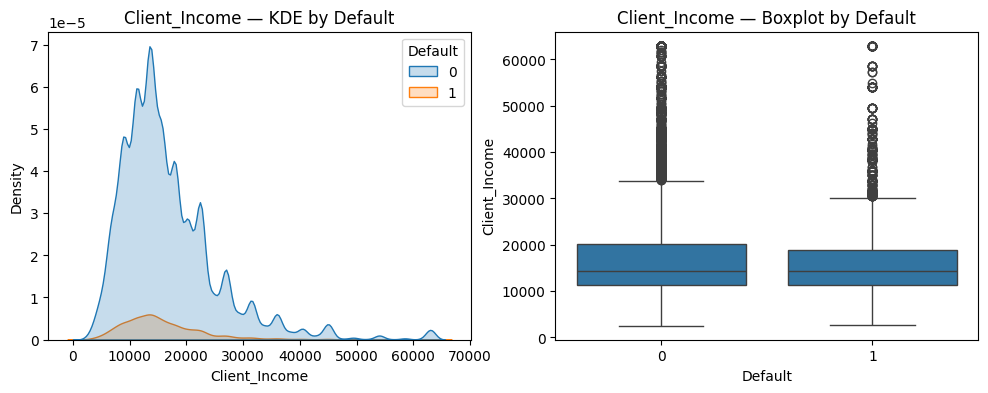


==== Child_Count ====
Default
0    0.0
1    0.0
Name: Child_Count, dtype: float64


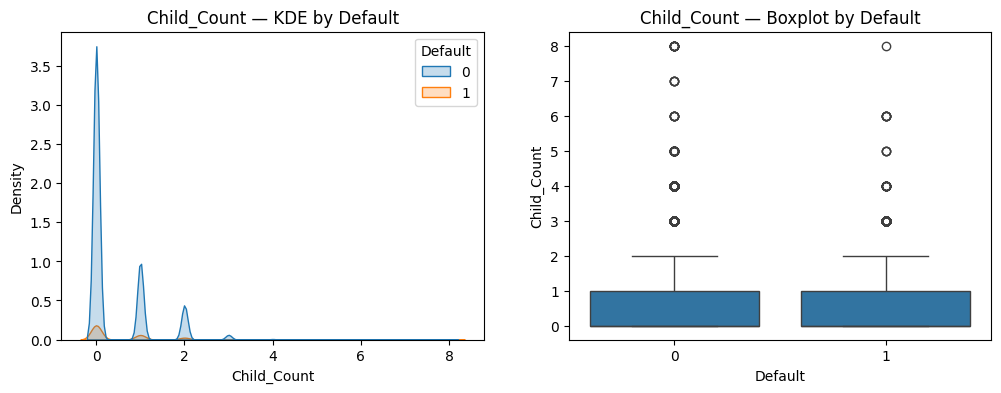


==== Credit_Amount ====
Default
0    51750.0
1    50940.0
Name: Credit_Amount, dtype: float64


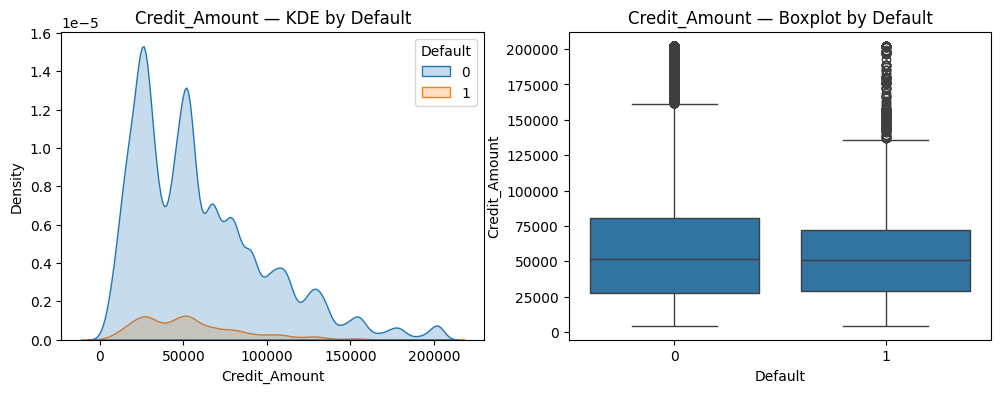


==== Loan_Annuity ====
Default
0    2499.75
1    2499.75
Name: Loan_Annuity, dtype: float64


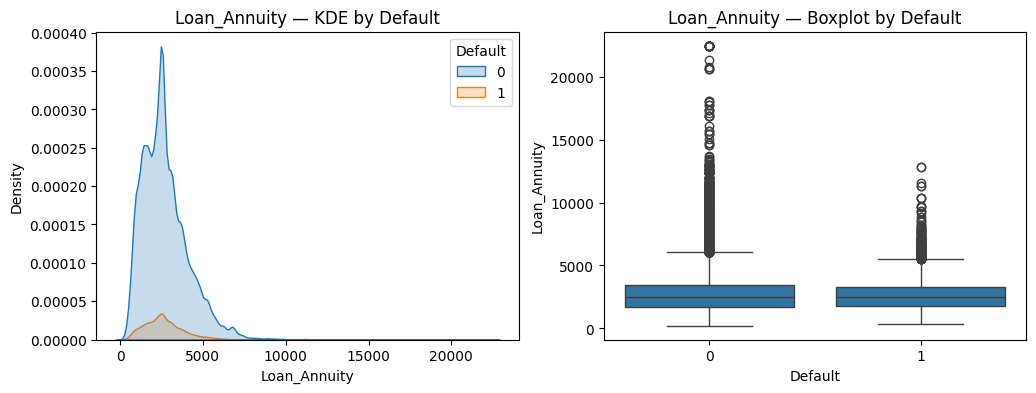


==== Population_Region_Relative ====
Default
0    0.018850
1    0.018801
Name: Population_Region_Relative, dtype: float64


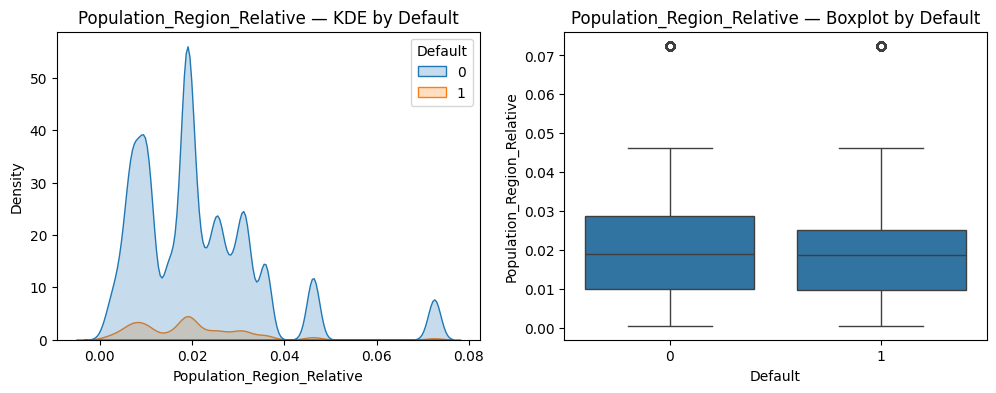


==== Age_Days ====
Default
0    15734.0
1    14582.0
Name: Age_Days, dtype: float64


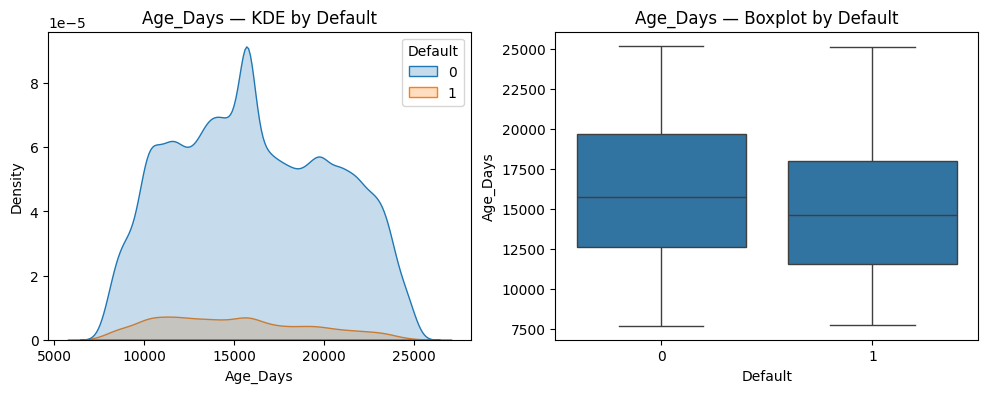


==== Employed_Days ====
Default
0    1780.0
1    1269.5
Name: Employed_Days, dtype: float64


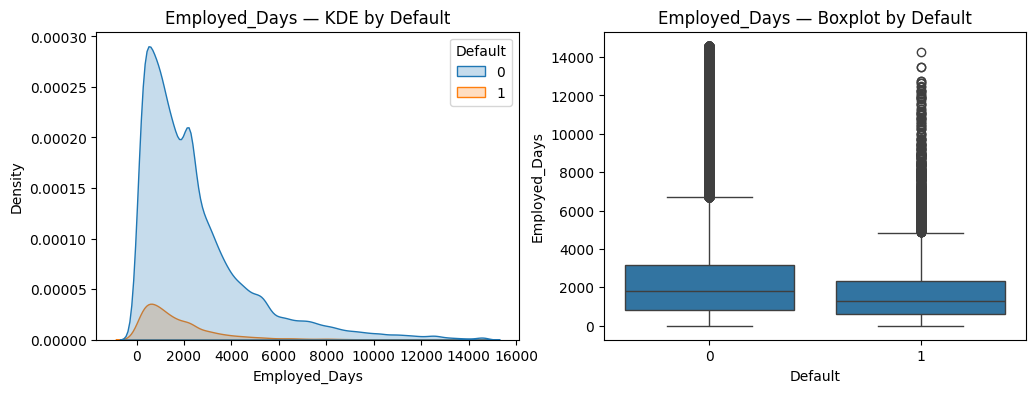


==== Registration_Days ====
Default
0    4493.0
1    4184.0
Name: Registration_Days, dtype: float64


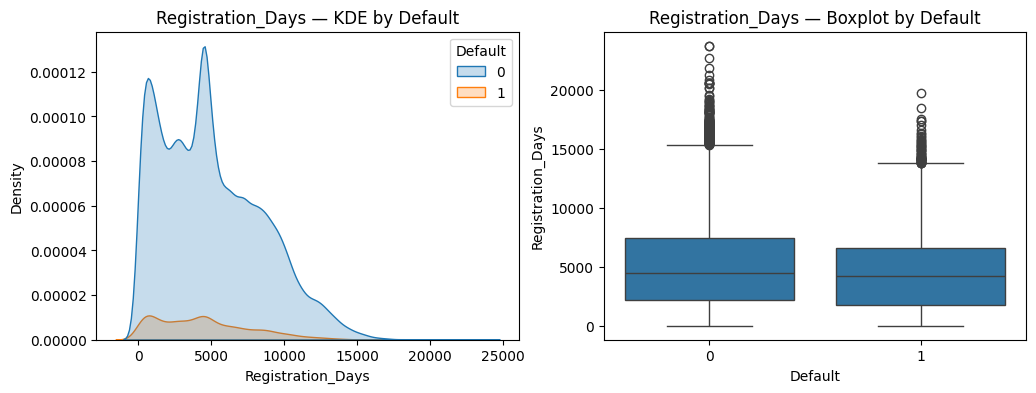


==== ID_Days ====
Default
0    3242.0
1    2940.0
Name: ID_Days, dtype: float64


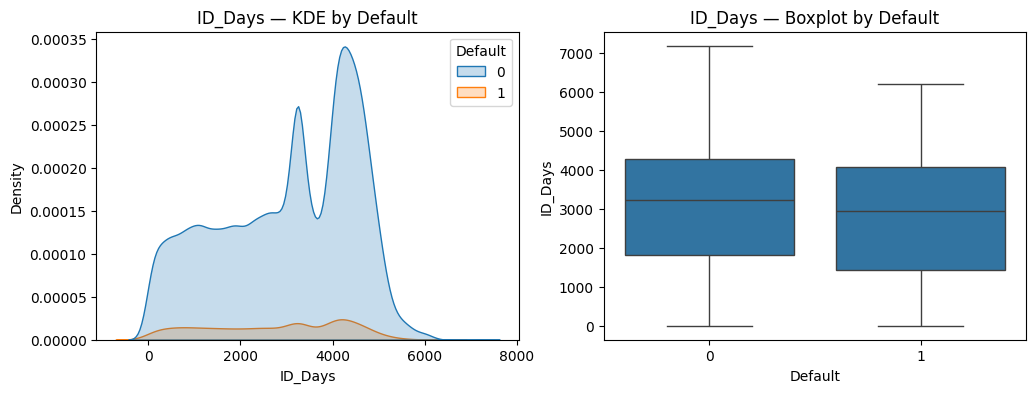


==== Own_House_Age ====
Default
0    0.0
1    0.0
Name: Own_House_Age, dtype: float64


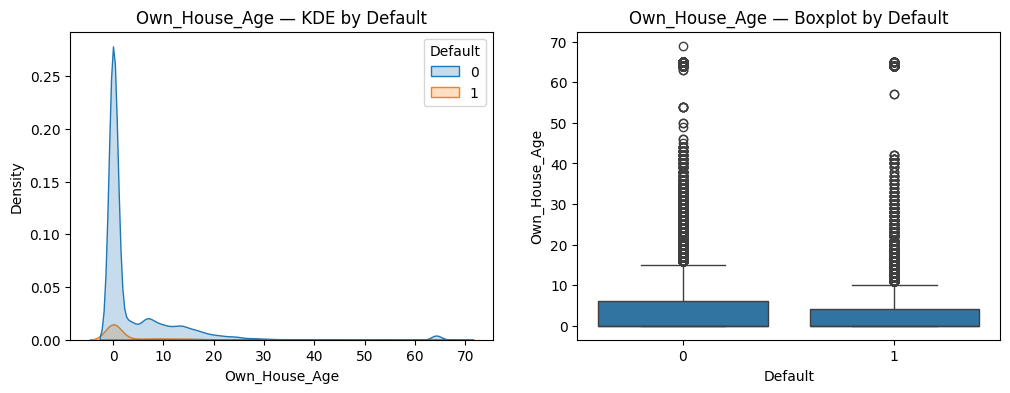


==== Client_Family_Members ====
Default
0    2.0
1    2.0
Name: Client_Family_Members, dtype: float64


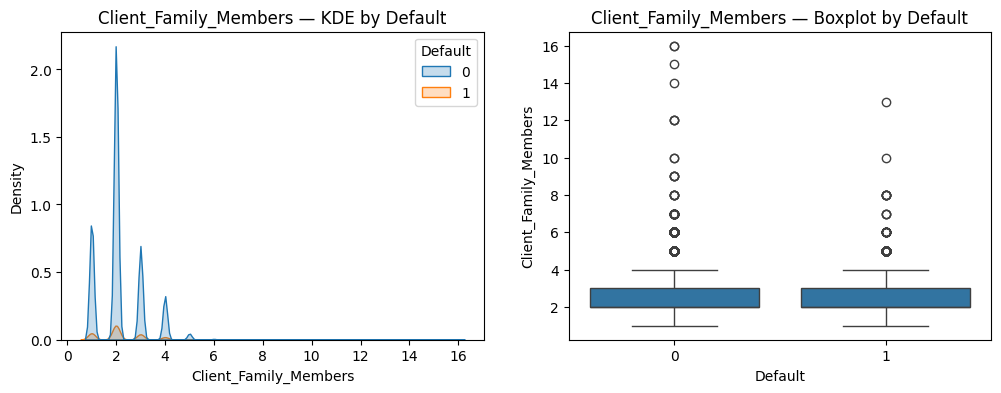


==== Client_City_Rating ====
Default
0    2.0
1    2.0
Name: Client_City_Rating, dtype: float64


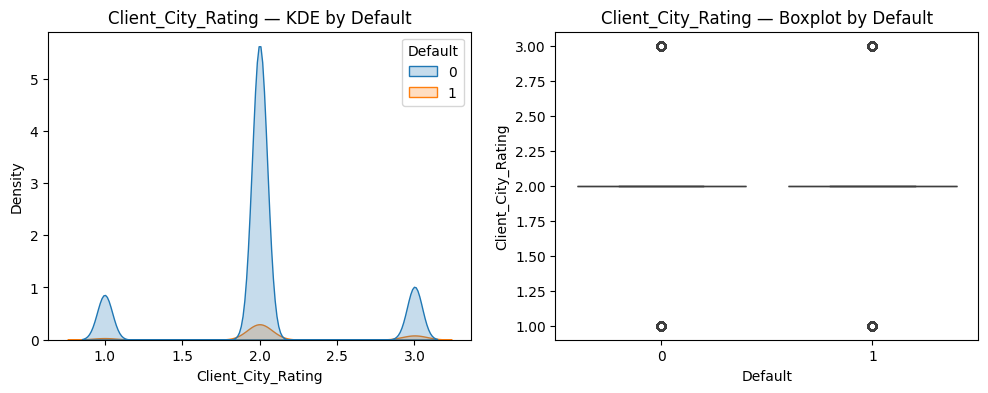


==== Application_Process_Hour ====
Default
0    12.0
1    12.0
Name: Application_Process_Hour, dtype: float64


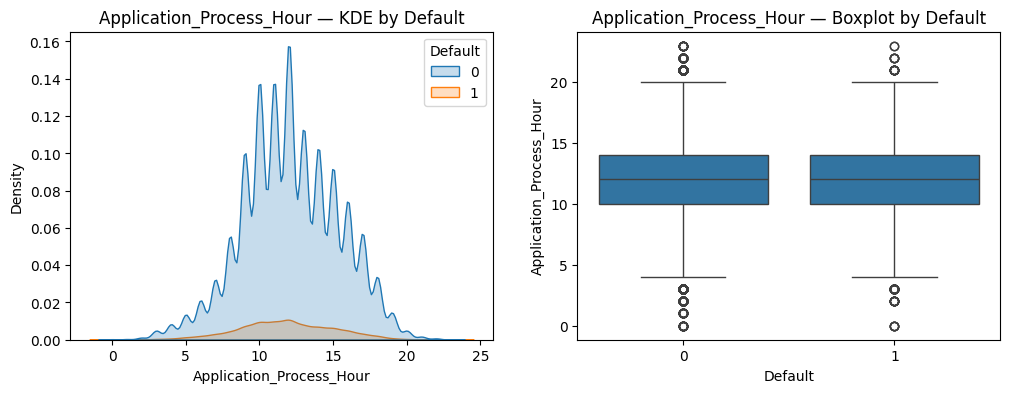


==== Score_Source_1 ====
Default
0    0.504657
1    0.504657
Name: Score_Source_1, dtype: float64


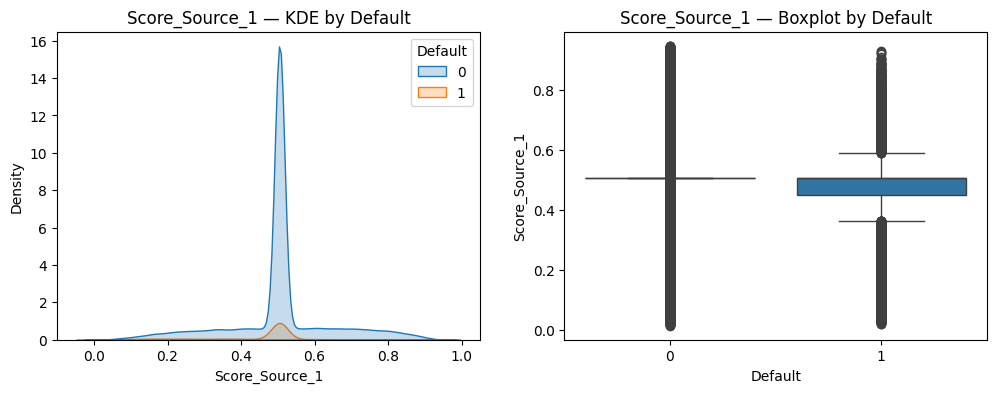


==== Score_Source_2 ====
Default
0    0.564978
1    0.458804
Name: Score_Source_2, dtype: float64


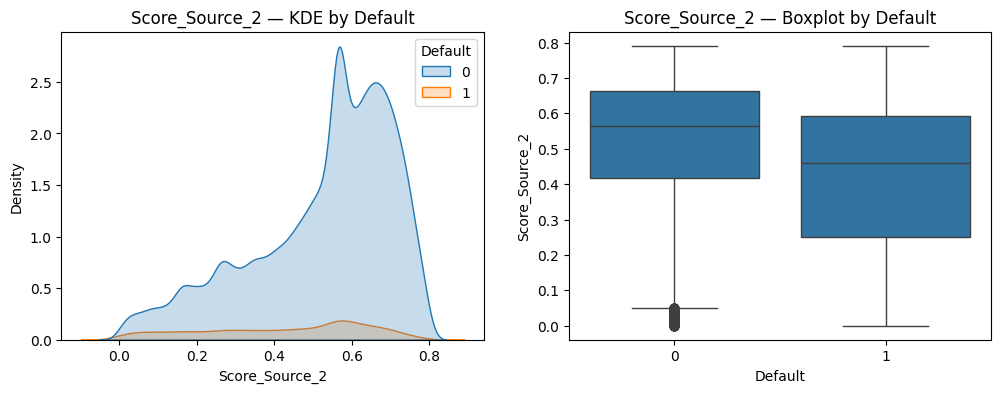


==== Score_Source_3 ====
Default
0    0.53707
1    0.49206
Name: Score_Source_3, dtype: float64


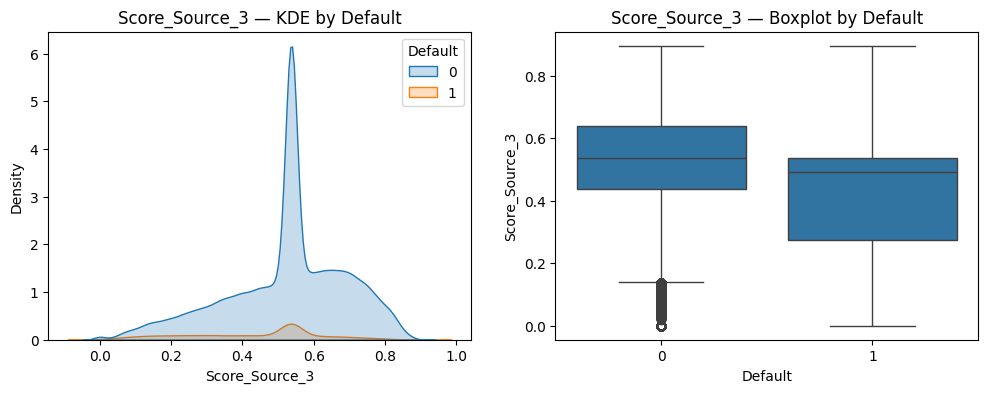


==== Social_Circle_Default ====
Default
0    0.0
1    0.0
Name: Social_Circle_Default, dtype: float64


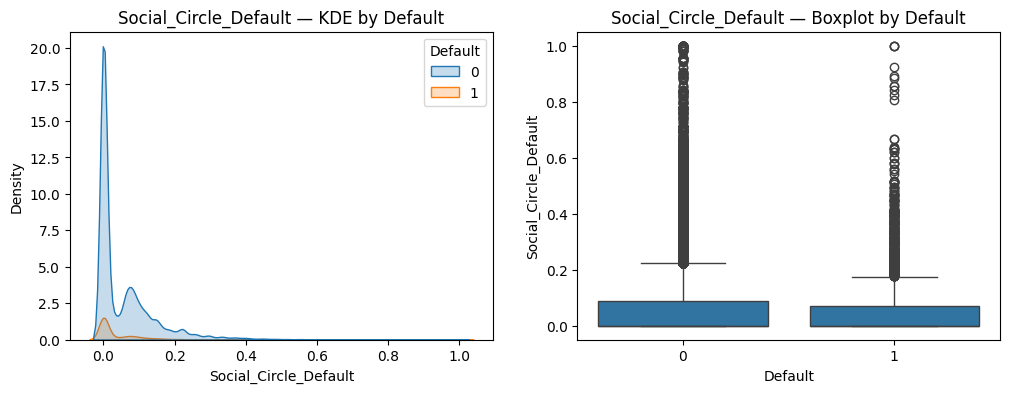


==== Phone_Change ====
Default
0    755.0
1    617.0
Name: Phone_Change, dtype: float64


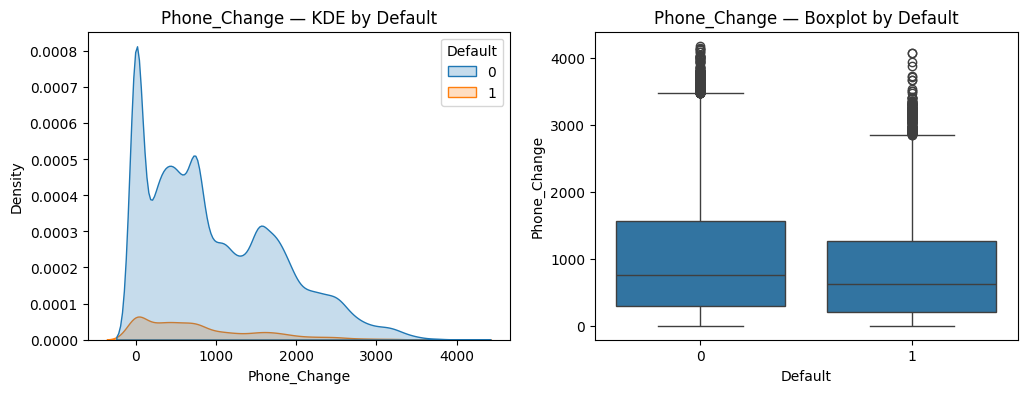


==== Credit_Bureau ====
Default
0    1.0
1    1.0
Name: Credit_Bureau, dtype: float64


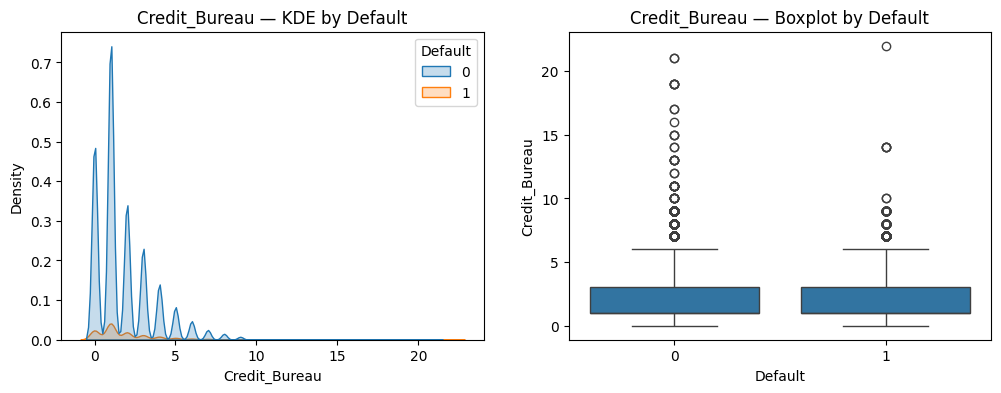


==== Employed_Days_missing ====
Default
0    0.0
1    0.0
Name: Employed_Days_missing, dtype: float64


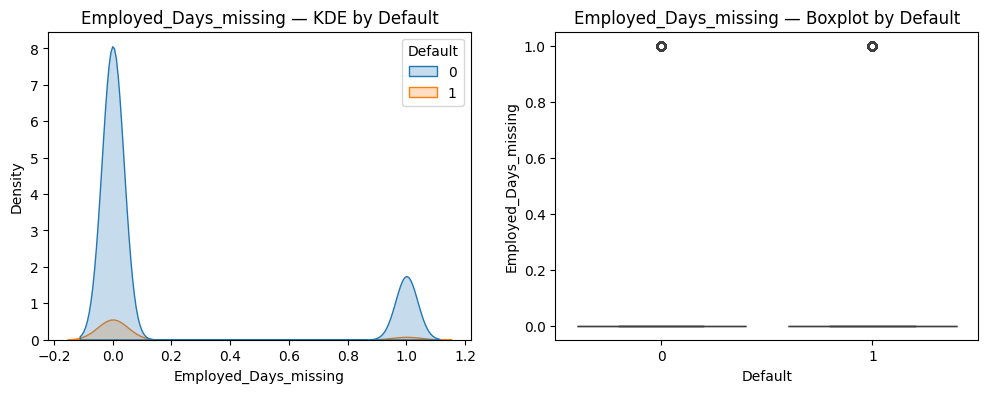

In [65]:
for col in num_cols:
    print(f"\n==== {col} ====")
    print(df.groupby('Default')[col].median())

    fig, axes = plt.subplots(1, 2, figsize=(12,4))

    # KDE distributions
    sns.kdeplot(data=df, x=col, hue='Default', ax=axes[0], fill=True)
    axes[0].set_title(f"{col} — KDE by Default")

    # Boxplot
    sns.boxplot(x='Default', y=col, data=df, ax=axes[1])
    axes[1].set_title(f"{col} — Boxplot by Default")

    plt.show()

client income, population region relative, score_source_2 are heavily skewed

In [62]:
df['Client_Income_log'] = np.log1p(df['Client_Income'])
df['Client_Income'] = df['Client_Income'].clip(upper=df['Client_Income'].quantile(0.995))

In [63]:
df['Population_Region_Relative'] = df['Population_Region_Relative'].clip(lower=1e-6, 
                                                                         upper=df['Population_Region_Relative'].quantile(0.995))
df['Population_Region_Relative_log'] = np.log1p(df['Population_Region_Relative'])


In [64]:
df['Score_Source_2'] = df['Score_Source_2'].clip(upper=df['Score_Source_2'].quantile(0.995))


##### Ran the above plots again :)

#### Categorical Columns

In [71]:
cat_cols = [x for x in cat_cols if x not in ["Mobile_Tag", "Default"]]
print(cat_cols)

['Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Loan_Contract_Type', 'Homephone_Tag', 'Workphone_Working', 'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag', 'Own_House_Age_missing', 'Score_Source_1_missing', 'Social_Circle_Default_missing', 'Score_Source_3_missing', 'Credit_Bureau_missing', 'Client_Gender', 'Client_Marital_Status', 'Client_Housing_Type', 'Accompany_Client', 'Application_Process_Day', 'Client_Income_Type']



==================== Car_Owned ====================
Car_Owned
0.0    0.085138
1.0    0.072084
Name: Default, dtype: float64

Counts:
Car_Owned
0.0    81303
1.0    40550
Name: count, dtype: int64


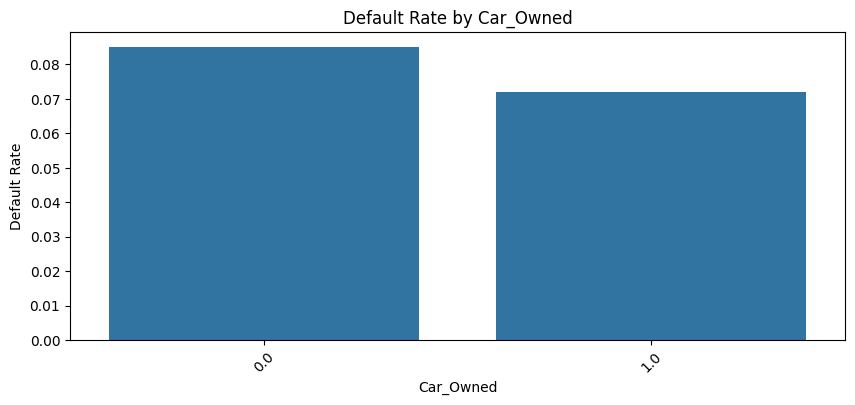


==================== Bike_Owned ====================
Bike_Owned
0.0    0.080878
1.0    0.080618
Name: Default, dtype: float64

Counts:
Bike_Owned
0.0    82569
1.0    39284
Name: count, dtype: int64


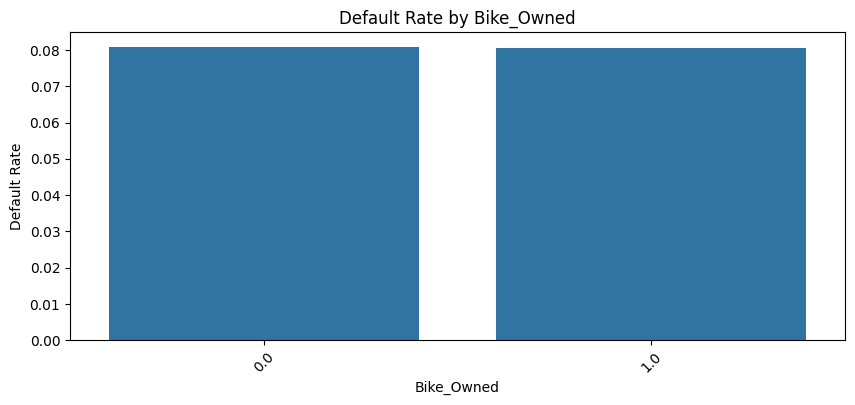


==================== Active_Loan ====================
Active_Loan
1.0    0.080815
0.0    0.080774
Name: Default, dtype: float64

Counts:
Active_Loan
0.0    62842
1.0    59011
Name: count, dtype: int64


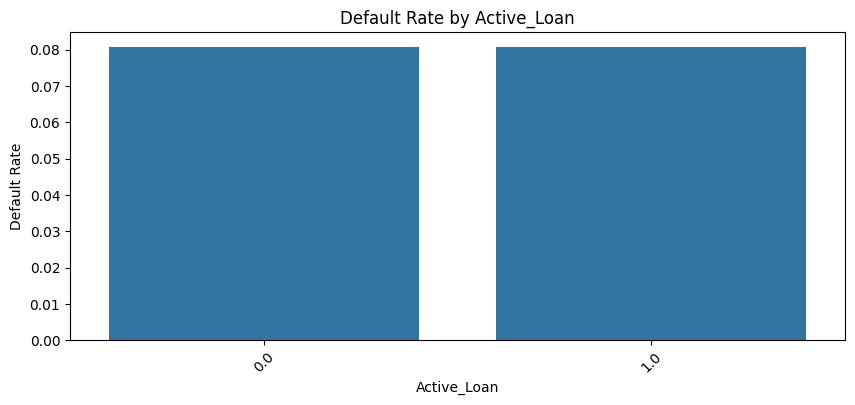


==================== House_Own ====================
House_Own
0.0    0.081051
1.0    0.080685
Name: Default, dtype: float64

Counts:
House_Own
1.0    85456
0.0    36397
Name: count, dtype: int64


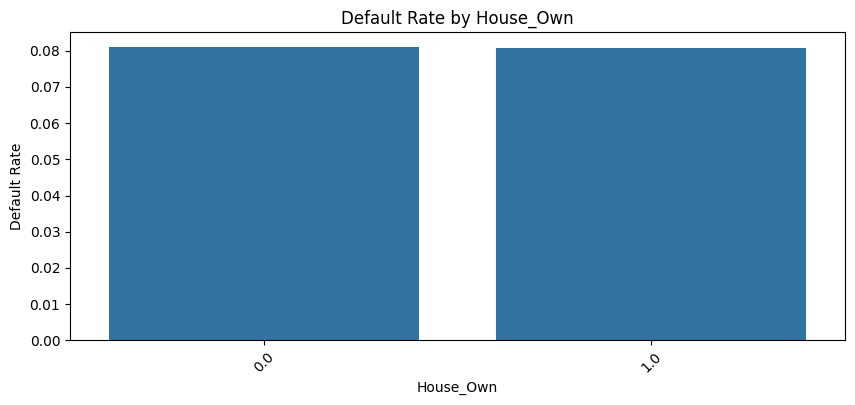


==================== Loan_Contract_Type ====================
Loan_Contract_Type
CL    0.083128
RL    0.057470
Name: Default, dtype: float64

Counts:
Loan_Contract_Type
CL    110769
RL     11084
Name: count, dtype: int64


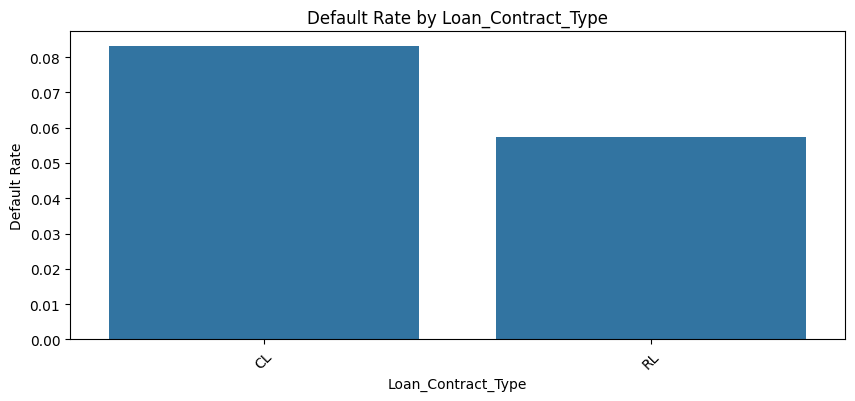


==================== Homephone_Tag ====================
Homephone_Tag
1    0.092554
0    0.077845
Name: Default, dtype: float64

Counts:
Homephone_Tag
0    97424
1    24429
Name: count, dtype: int64


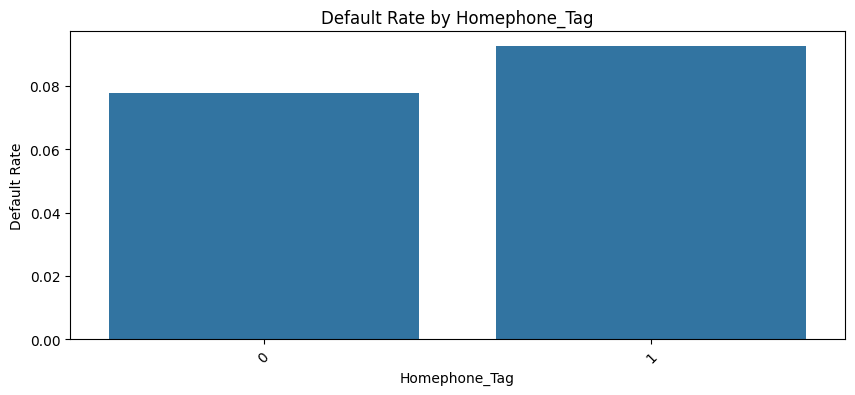


==================== Workphone_Working ====================
Workphone_Working
0    0.085170
1    0.069609
Name: Default, dtype: float64

Counts:
Workphone_Working
0    87590
1    34263
Name: count, dtype: int64


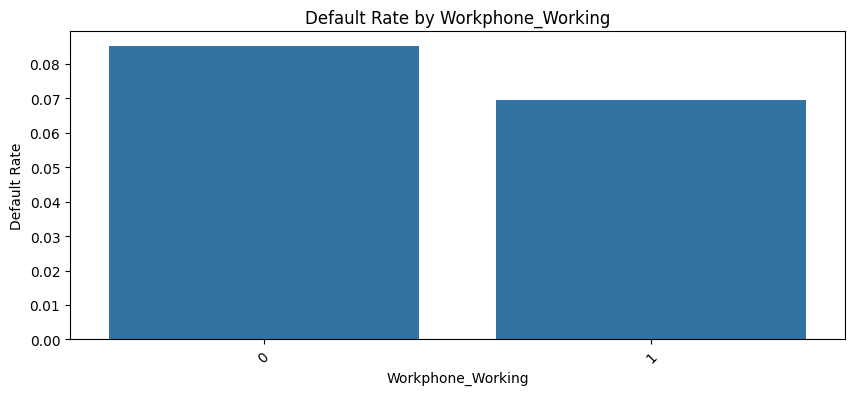


==================== Client_Permanent_Match_Tag ====================
Client_Permanent_Match_Tag
No     0.120825
Yes    0.077447
Name: Default, dtype: float64

Counts:
Client_Permanent_Match_Tag
Yes    112451
No       9402
Name: count, dtype: int64


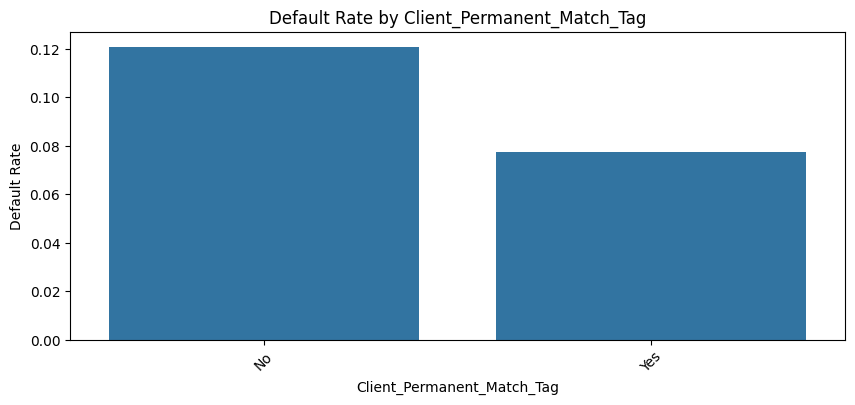


==================== Client_Contact_Work_Tag ====================
Client_Contact_Work_Tag
No     0.097111
Yes    0.077231
Name: Default, dtype: float64

Counts:
Client_Contact_Work_Tag
Yes    100012
No      21841
Name: count, dtype: int64


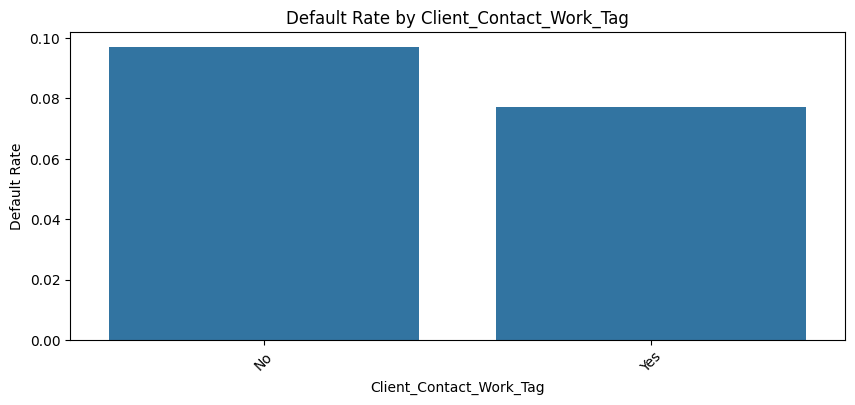


==================== Own_House_Age_missing ====================
Own_House_Age_missing
1    0.085338
0    0.072079
Name: Default, dtype: float64

Counts:
Own_House_Age_missing
1    80093
0    41760
Name: count, dtype: int64


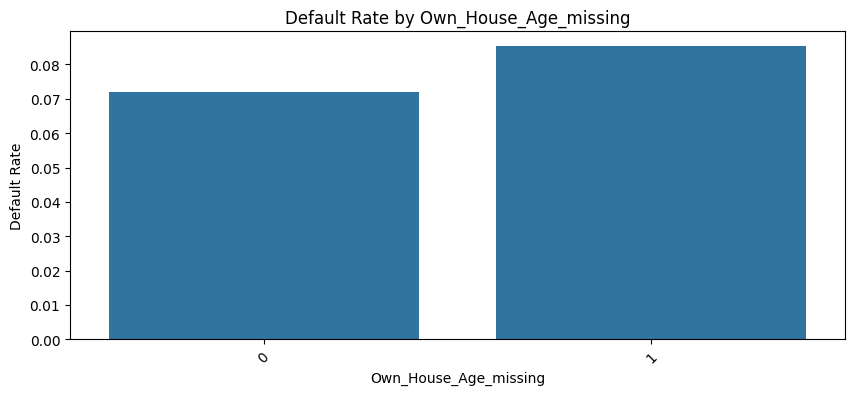


==================== Score_Source_1_missing ====================
Score_Source_1_missing
1    0.086193
0    0.073785
Name: Default, dtype: float64

Counts:
Score_Source_1_missing
1    68834
0    53019
Name: count, dtype: int64


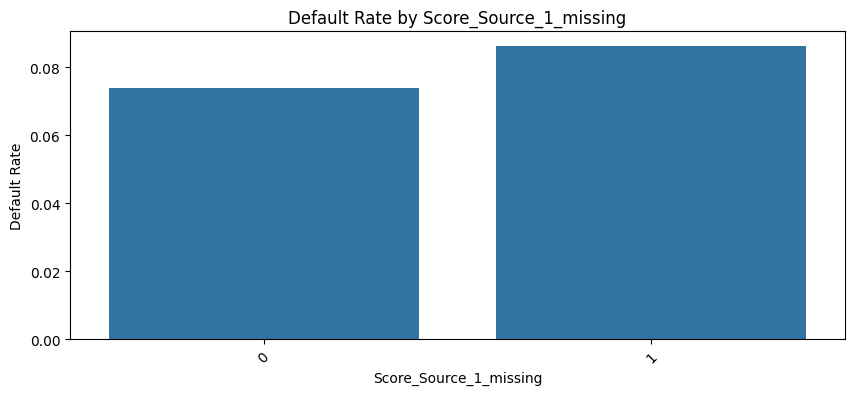


==================== Social_Circle_Default_missing ====================
Social_Circle_Default_missing
1    0.091623
0    0.069604
Name: Default, dtype: float64

Counts:
Social_Circle_Default_missing
1    61928
0    59925
Name: count, dtype: int64


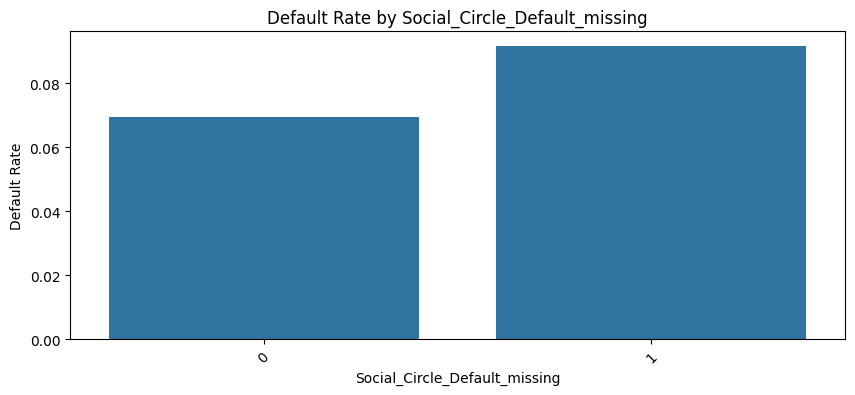


==================== Score_Source_3_missing ====================
Score_Source_3_missing
1    0.088626
0    0.078573
Name: Default, dtype: float64

Counts:
Score_Source_3_missing
0    94931
1    26922
Name: count, dtype: int64


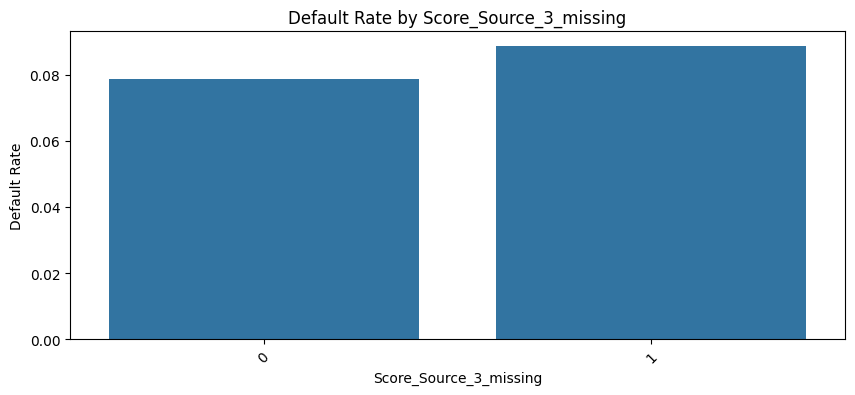


==================== Credit_Bureau_missing ====================
Credit_Bureau_missing
1    0.098436
0    0.077628
Name: Default, dtype: float64

Counts:
Credit_Bureau_missing
0    103313
1     18540
Name: count, dtype: int64


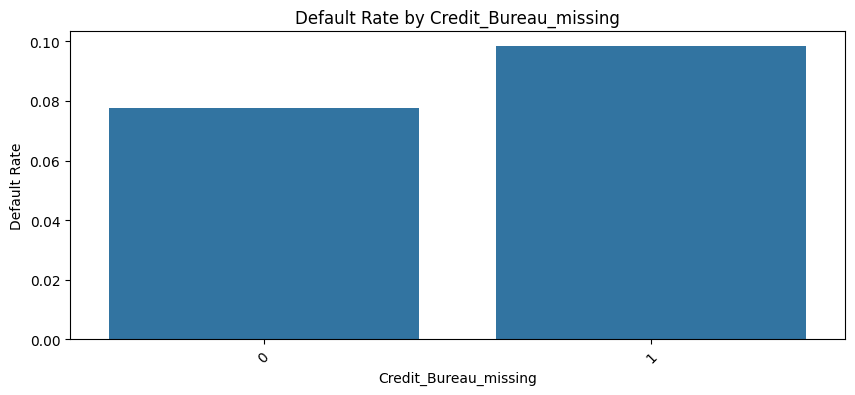


==================== Client_Gender ====================
Client_Gender
Female    0.100154
Male      0.070985
Name: Default, dtype: float64

Counts:
Client_Gender
Male      80876
Female    40977
Name: count, dtype: int64


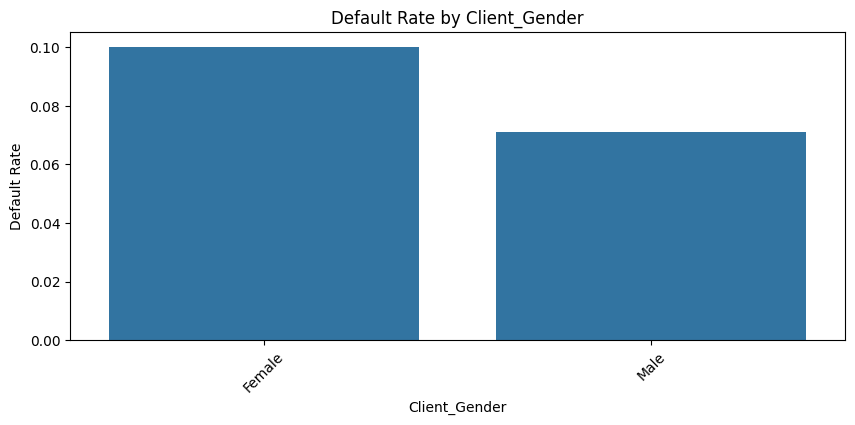


==================== Client_Marital_Status ====================
Client_Marital_Status
S    0.096989
M    0.079069
D    0.077290
W    0.064537
Name: Default, dtype: float64

Counts:
Client_Marital_Status
M    90819
S    17404
D     7556
W     6074
Name: count, dtype: int64


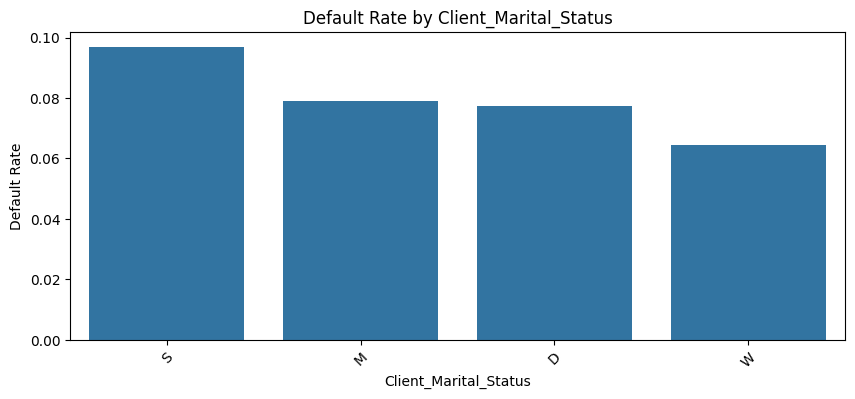


==================== Client_Housing_Type ====================
Client_Housing_Type
Rental       0.126101
Family       0.112398
Shared       0.100000
Municipal    0.088748
Home         0.078081
Office       0.067864
Name: Default, dtype: float64

Counts:
Client_Housing_Type
Home         108554
Family         5783
Municipal      4248
Rental         1816
Office         1002
Shared          450
Name: count, dtype: int64


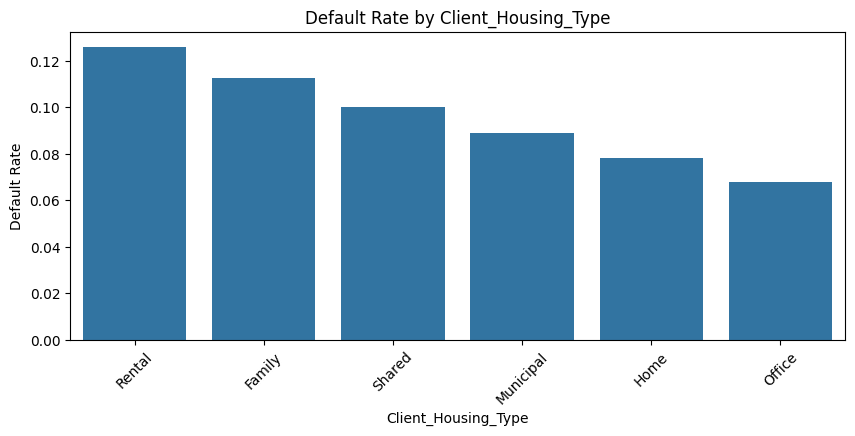


==================== Accompany_Client ====================
Accompany_Client
Alone       0.082015
Partner     0.079274
Other       0.075503
Relative    0.074363
Name: Default, dtype: float64

Counts:
Accompany_Client
Alone       99153
Relative    15747
Partner      4516
Other        2437
Name: count, dtype: int64


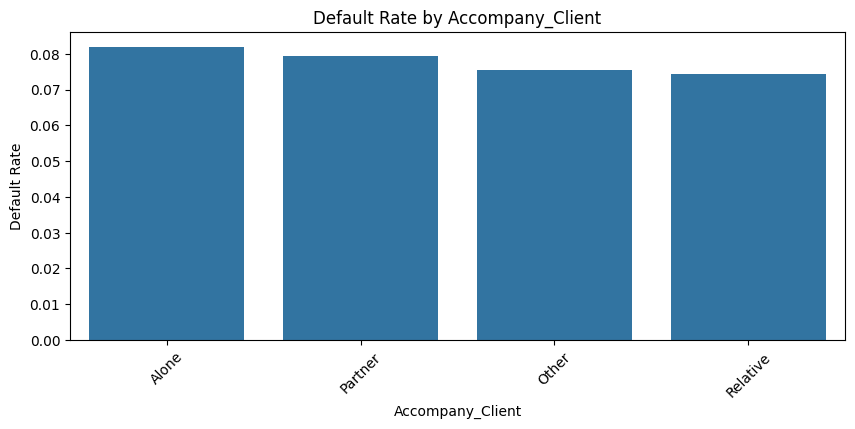


==================== Application_Process_Day ====================
Application_Process_Day
2.0    0.082891
6.0    0.082819
3.0    0.082816
5.0    0.081332
4.0    0.080439
1.0    0.076552
0.0    0.075076
Name: Default, dtype: float64

Counts:
Application_Process_Day
3.0    22544
2.0    20907
1.0    19712
4.0    19667
5.0    19611
6.0    13125
0.0     6287
Name: count, dtype: int64


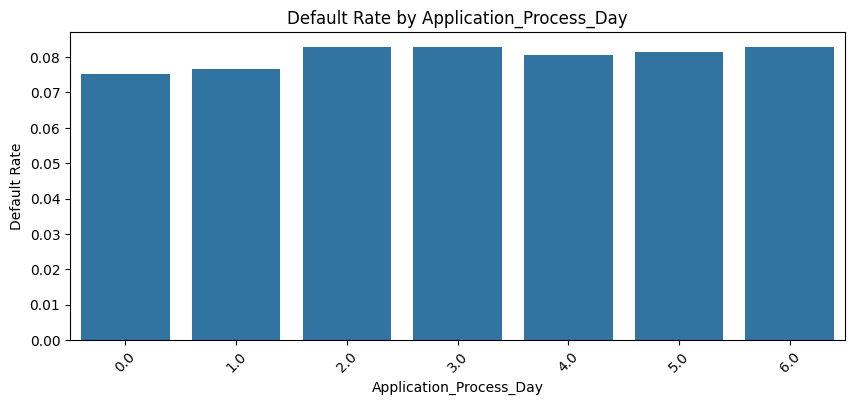


==================== Client_Income_Type ====================
Client_Income_Type
Other         0.176471
Service       0.094010
Commercial    0.075892
Govt Job      0.058292
Retired       0.055410
Name: Default, dtype: float64

Counts:
Client_Income_Type
Service       64727
Commercial    27763
Retired       21043
Govt Job       8303
Other            17
Name: count, dtype: int64


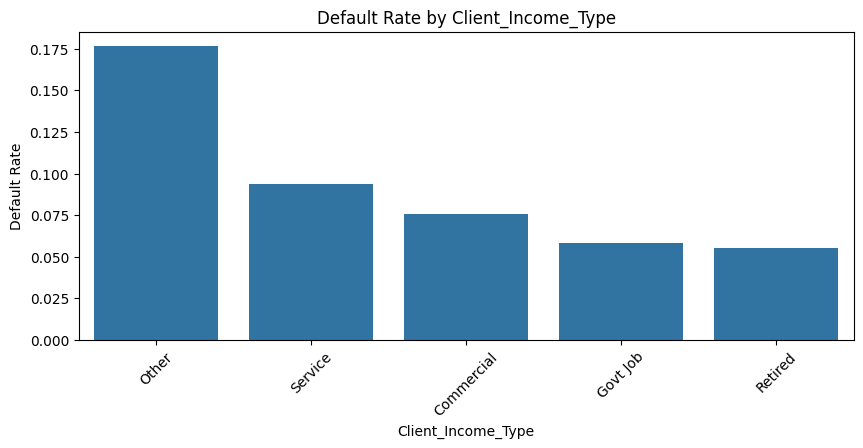

In [72]:
for col in cat_cols:
    print(f"\n==================== {col} ====================")
    
    # Default rate table
    temp = df.groupby(col)['Default'].mean().sort_values(ascending=False)
    print(temp)
    
    # Frequency table
    print("\nCounts:")
    print(df[col].value_counts())
    
    # Plot default rate
    plt.figure(figsize=(10,4))
    sns.barplot(x=temp.index, y=temp.values)
    plt.title(f"Default Rate by {col}")
    plt.ylabel("Default Rate")
    plt.xticks(rotation=45)
    plt.show()

These all seem fine. We can understand visually which category for each column is more likely to default.
No further comments.

#### Feature Strength Monitoring - AUC

In [75]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [74]:
auc_scores_num = {}

for col in num_cols:
    print(col, "done")
    X = df[[col]].fillna(0)  # simple handling
    y = df['Default']

    # scale if needed
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # logistic regression
    model = LogisticRegression()
    model.fit(X_scaled, y)
    preds = model.predict_proba(X_scaled)[:,1]

    auc = roc_auc_score(y, preds)
    auc_scores_num[col] = auc

# Sort
sorted_auc_nums = dict(sorted(auc_scores_num.items(), key=lambda x: x[1], reverse=True))
sorted_auc_nums

Client_Income done
Child_Count done
Credit_Amount done
Loan_Annuity done
Population_Region_Relative done
Age_Days done
Employed_Days done
Registration_Days done
ID_Days done
Own_House_Age done
Client_Family_Members done
Client_City_Rating done
Application_Process_Hour done
Score_Source_1 done
Score_Source_2 done
Score_Source_3 done
Social_Circle_Default done
Phone_Change done
Credit_Bureau done
Employed_Days_missing done


{'Score_Source_2': 0.6466034023035937,
 'Score_Source_3': 0.642942784885604,
 'Age_Days': 0.5767849002587024,
 'Score_Source_1': 0.5759831922148491,
 'ID_Days': 0.557211637081426,
 'Phone_Change': 0.5565574698302947,
 'Social_Circle_Default': 0.5470894228733353,
 'Client_City_Rating': 0.5468500526825172,
 'Registration_Days': 0.5381049275882457,
 'Employed_Days': 0.530386688986773,
 'Employed_Days_missing': 0.5297026591802972,
 'Population_Region_Relative': 0.5296258757763403,
 'Application_Process_Hour': 0.5231975404136591,
 'Client_Income': 0.5197144805081579,
 'Child_Count': 0.5182641628405777,
 'Credit_Amount': 0.5173005268360539,
 'Credit_Bureau': 0.511844997087018,
 'Client_Family_Members': 0.5085558288679155,
 'Loan_Annuity': 0.4995746122973368,
 'Own_House_Age': 0.4866718314468505}

In [76]:
auc_scores_cat = {}

for col in cat_cols:
    print(col, "done")
    
    X = df[[col]].copy()
    y = df['Default']

    # temporary label encoding
    le = LabelEncoder()
    try:
        X_encoded = le.fit_transform(X[col])
    except:
        X_encoded = X[col].astype(str)
        X_encoded = le.fit_transform(X_encoded)

    X_encoded = X_encoded.reshape(-1,1)

    model = LogisticRegression()
    model.fit(X_encoded, y)
    preds = model.predict_proba(X_encoded)[:,1]

    auc = roc_auc_score(y, preds)
    auc_scores_cat[col] = auc

sorted_auc_cats = dict(sorted(auc_scores_cat.items(), key=lambda x: x[1], reverse=True))
sorted_auc_cats

Car_Owned done
Bike_Owned done
Active_Loan done
House_Own done
Loan_Contract_Type done
Homephone_Tag done
Workphone_Working done
Client_Permanent_Match_Tag done
Client_Contact_Work_Tag done
Own_House_Age_missing done
Score_Source_1_missing done
Social_Circle_Default_missing done
Score_Source_3_missing done
Credit_Bureau_missing done
Client_Gender done
Client_Marital_Status done
Client_Housing_Type done
Accompany_Client done
Application_Process_Day done
Client_Income_Type done


{'Client_Gender': 0.543830825459068,
 'Client_Income_Type': 0.5397800650457784,
 'Social_Circle_Default_missing': 0.5370505903064531,
 'Workphone_Working': 0.5211748596713817,
 'Client_Permanent_Match_Tag': 0.5207951109855063,
 'Score_Source_1_missing': 0.5205324878122142,
 'Own_House_Age_missing': 0.5201092389141906,
 'Client_Contact_Work_Tag': 0.5196902281774911,
 'Car_Owned': 0.5195146906723525,
 'Credit_Bureau_missing': 0.5180714369092624,
 'Homephone_Tag': 0.5158726455329372,
 'Loan_Contract_Type': 0.514283614346055,
 'Score_Source_3_missing': 0.5116503722127662,
 'Client_Marital_Status': 0.509115708705273,
 'Accompany_Client': 0.5068461336415461,
 'Application_Process_Day': 0.5057505986385867,
 'House_Own': 0.5005159452442797,
 'Bike_Owned': 0.5003820235179458,
 'Active_Loan': 0.49993032584301006,
 'Client_Housing_Type': 0.49655116278243056}